# Final Project Submission

Please fill out:
* Student name: James M. Irving, Ph.D.
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis, Jeff Herman
* Blog post URL:


# Goal:
> **To create a deep-learning Natural Language Processing neural network that can analyze the language content of a Tweet to determine if the tweet was written by an authentic user or a Russian Troll.**


## Methods Overview:


- We started with a dataset of **3 Million Tweets sent from 2,752 Twitter accounts connected to the "Internet Research Agency," a Russian-Troll farm** that was part of The Mueller Investigation's February 2018 indictments. The tweets cover a range from February 2012 to May 2018, with the majority published from 2015-2017.<br><br>

    - The tweets [published on Kaggle by FiveThirtyEight](https://www.kaggle.com/fivethirtyeight/russian-troll-tweets) and were originally **collected by Clemson University researchers, Dr. Darren Linvill and Dr. Patrick Warren**, using custom searches using Social-Studio software licensed by Clemson University. 
        - Their analysis on the various tactics used and the various social groups that were targeted by the trolls is detailed in their manuscript ["Troll Factories: The Internet Research Agency and State-Sponsored Agenda Building"](http://pwarren.people.clemson.edu/Linvill_Warren_TrollFactory.pdf) published in July of 2018.
        
<br>

- **However, since the goal is to produce a machine learning model that can accurately classify if a tweet came from an authentic user or a Russian troll, we needed to acquire a set of control tweets from non-trolls.** 
- Additional details are in the section "Approach and Observations for Newly-Extracted Control Tweets" below.

___

### Original Troll Dataset Features:
- The starting dataset was published on Kaggleby by FiveThirtyEight.
    - https://www.kaggle.com/fivethirtyeight/russian-troll-tweets/downloads/russian-troll-tweets.zip/2
<br>    
- It was originally collected and coded by the researchers Linvill And Warren for an academic analysis on the different types of tactics used by the Russian trolls and the different social groups they targeted. 

- For our analyses, we will be focusing strictly on the language of the tweets, and none of the other characteristics int he dataset. 

- **Variables:**
    - ~~`external_author_id` | An author account ID from Twitter~~
    - `author` | The handle sending the tweet
    - `content` | The text of the tweet
    - ~~`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)~~
    - `language` | The language of the tweet
    - `publish_date` | The date and time the tweet was sent
    - ~~`harvested_date` | The date and time the tweet was collected by Social Studio~~
    - ~~`following` | The number of accounts the handle was following at the time of the tweet~~
    - ~~`followers` | The number of followers the handle had at the time of the tweet~~
    - ~~`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes~~
    - ~~`post_type` | Indicates if the tweet was a retweet or a quote-tweet *[Whats a quote-tweet?]*~~
    - ~~`account_type` | Specific account theme, as coded by Linvill and Warren~~
    - `retweet` | A binary indicator of whether or not the tweet is a retweet
    - ~~`account_category` | General account theme, as coded by Linvill and Warren~~
    - ~~`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018~~

#### Observations on the Troll Tweet Dataset
- **Dataset is comprised of 2,973,371 tweets.**
    - Target Tweet Text to Analyze is in `Content`
    
- **Thoughts on specific features:**
    - `language`
        - There are 56 unique languages. 
        - 2.1 million are English (71.6%), 670 K are in Russian, etc.
        - [x] Drop all non-English tweets. 

    - `retweet`
        - 1.3 million entries are retweets (44.1 % )
        - Since this analysis will use language content to predict author, retweets are not helpful.
        - Retweets were not written by the account's author and should be not considered.
        - [x] Drop all retweets

- **Final Troll Tweet Summary:**
    - After dropping non-English tweets and retweets, there are **1,272,848 Russian-Troll tweets.**

### Approach and Observations for Newly-Extracted Control Tweets
Since the goal is to produce a machine learning model that can accurately classify if a tweet came from an authentic user or a Russian troll, we needed to acquire a set of control tweets from non-trolls.
- To do this we examined the top 20 hashtags(#) and mentions(@) an the dates of publication of the Troll tweets to construct the control dataset. 
- However, due to limitations of the Twitter API (including the inability to search for specific date ranges) we extracted present-day tweets directed at the top 40 most-frequent mentions (@s) from the troll Tweets.
    - We had planned to use both hashtags and ats to construct this dataset, but the most common #'s from the troll tweets were very generic (#news, #sports), and using these with presend-day tweets would have created a biased dataset that would make it far too easily for a model to detect the difference. 

#### Notes on Dataset:
- Our newly extracted control dataset is comprised of 39,086 tweets ranging from 05/24/19 to 06/03/19.
- We do not have equal number of troll tweets and new tweets, so we will have to sample from the troll tweets to meet the # of new controls. 

# Combining & Sampling Original Troll Tweets and with Newly-Harvested Control Tweets

In [1]:
# Custom functions written for this project are located in mod4functions_JMI.py in the main folder of this repo.
# from mod4functions_JMI import *
import mod4functions_JMI as jmi

import bs_ds as bs
from bs_ds.imports import *

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


In [4]:
# Load in a  partially-processed version of the Troll Tweets (have already dropped non-English tweets and retweets.)
df = pd.read_csv('final_dataset/russian_troll_tweets_eng_only_date_pub_index.csv', encoding='utf-8', index_col=0)

# Add label column troll_tweet, set =1 for original troll tweets
df['troll_tweet'] = 1

# Recast date_published as datetime and make index
df['date_published'] = pd.to_datetime(df['publish_date'])
df.set_index('date_published', inplace=True)

# Drop any tweets missing the actual Tweet content
df.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df.head(3)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,troll_tweet
date_published,,,,,,,,,,,,,,
2017-10-01 19:58:00,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll,1
2017-10-01 22:43:00,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,1
2017-10-01 23:52:00,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,1


### Retreiving Only Tweets with the Top 40 @'s

In [7]:
# Get all tweet tags and @'s from text_to_search_list
from mod4functions_JMI import get_tags_ats

# Need to get a list of hash tags.
full_text_to_search = df['content']

tweet_tags, tweet_ats = get_tags_ats(full_text_to_search, show_counts=False)
print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# Create a dataframe with top_tags
df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
df_top_tags['% Total'] = (df_top_tags['tags']/len(tweet_tags)*100)

# Create a dataframe with top_ats
df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
df_top_ats['% Total'] = (df_top_ats['ats']/len(tweet_ats)*100)

display(df_top_tags[:10]),display(df_top_ats[:10])

There were 832208 unique hashtags and 673442 unique @'s



,tags,% Total
#news,118624,14.254129
#sports,45544,5.472670
#politics,37452,4.500317
#world,27077,3.253634
#local,23130,2.779353
#TopNews,14621,1.756893
#health,10328,1.241036
#business,9558,1.148511
#BlackLivesMatter,8252,0.991579
#tech,7836,0.941592


,ats,% Total
@midnight,6691,0.993553
@realDonaldTrump,3532,0.524470
@WarfareWW,1529,0.227043
@CNN,1471,0.218430
@HillaryClinton,1424,0.211451
@POTUS,1035,0.153688
@CNNPolitics,948,0.140769
@FoxNews,930,0.138097
@mashable,740,0.109883
@YouTube,680,0.100974


(None, None)

### Loading in the new control tweets

In [5]:
# Load in harvest tweets
df_new = pd.read_csv('final_dataset/newly_extracted_control_tweets.csv', encoding='utf-8', index_col=0)

# Recast date_published as datetime and make index
df_new['date_published'] = pd.to_datetime(df_new['publish_date'])
df_new.set_index('date_published', inplace=True)

# Label the control tweets as troll_tweet=0
df_new['troll_tweet'] = 0

# Keep only non-retweeted tweets
df_new = df_new.loc[df_new['retweet']==0]

# Keep only english tweets
df_new = df_new.loc[df_new['language']=='en']

# Drop problematic nan in 'content'
df_new.dropna(subset=['content'],inplace=True)

df_new.head()

,external_author_id,author,content,region,following,followers,updates,post_type,account_type,retweet,account_category,publish_date,language,troll_tweet
date_published,,,,,,,,,,,,,,
2019-06-02 18:34:59,1.114658e+18,Draftdodgingdon,@realDonaldTrump it’s perfectly reasonable tha...,NaN,NaN,0.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,1.038424e+18,beapartofthemo1,RT @BelkissObadia: BREAKING NEWS: \n\n@realDon...,"Bradenton, FL",NaN,1198.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.798349e+17,BarbHuber9,@realDonaldTrump I thought you were supposed t...,NaN,NaN,1099.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,4.765020e+09,nonamehombre,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,69.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.244085e+17,letbuildthewall,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,18.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0


In [9]:
df_new.index.min(), df_new.index.max()

(Timestamp('2019-05-24 03:23:03'), Timestamp('2019-06-03 02:09:16'))

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39086 entries, 2019-06-02 18:34:59 to 2019-06-03 00:09:23
Data columns (total 14 columns):
external_author_id    39086 non-null float64
author                39086 non-null object
content               39086 non-null object
region                24921 non-null object
following             0 non-null float64
followers             39086 non-null float64
updates               0 non-null float64
post_type             39086 non-null object
account_type          39086 non-null object
retweet               39086 non-null bool
account_category      39086 non-null object
publish_date          39086 non-null object
language              39086 non-null object
troll_tweet           39086 non-null int64
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 4.2+ MB


#### Concatenating Troll Tweets and New Tweets

In [7]:
# Confirming the columns of the old and new data match before concatenating
if set(df.columns) == set(df_new.columns):
    # Concatenate the dataframes then get a ProfileReport
    df_full = pd.concat([df,df_new],axis=0)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Investigating and Preprocessing the New Full Dataset

In [76]:
bs.html_on('')
# from pandas_profiling import ProfileReport
# ProfileReport(df_full)

# SCRUB: Text Processing: tokenizing, removing stopwords, urls, hashtags

## Using RegularExpressions to extract and replace Urls, Hashtags, and Mentions

- [x] URLs, hasthtags, mentions were already removed.
    - hashtags and mentions are in `content_hashtags`,`content_mentions`
- **Cleaned data columns are:**
    - `content_min_clean`: only RT headers and urls have been removed.
    - `content`: RT headers, urls, hashtags, mentions were all removed. 

#### ADDRESSING THE "RT" ISSUE
- **Summary: many messages in both the troll tweets and new control tweets are prepended with "RT".**
    - Some are `RT @handle:` others are just `RT handle:`, but SOME are using `RT` internally as an abbreviation for the idea of a retweet, not as an indicator that the _current message_ is a retweet. 

___
- [Reference Article from 2014 re: the usage of RT and more modern methods of reatweeting.](https://socialnetworking.lovetoknow.com/What_Does_RT_on_Twitter_Mean)
- According to this article, using "RT @Username:" in an anachronism that has been replaced by an automated retweet function, but that many die-hard old school twitter users still prefer to do it the manual way. 
- Therefore, by filtering out tweets marked as officially retweeted by the Twitter API, but keeping tweets thats were manually retweeted using "RT @handle:", can produce a sort of sampling error.
    - That being said, if someone is taking the effort to manually type the origin and quote, that level of effort, in my opinion, still is a reasonable metric to use to separate out these tweets from the auto-retweeted tweets.
    
- **HOWEVER: there is still the issue of what effect this has on the dataset.**
- **My proposed solution:**
    1. [x] take current df['content'] column and change it to df['content_raw'] (so that it is no longer used by the following code)
    2. [x] **create a new df['content_min_clean'] column that uses  regexp to remove all `RT @handle:` and `RT handle:` from the `df['raw']` column and all URL links, but keeps mentions and hashtags**
        - Use for some vectorized analyses
    3. [x] Create a new `hashtags` and `mentions` columns that will find and save any handles and hashtags from anywhere in the NEW `RT @mention:`-removed content.
        - This means that any hashtags that represent the original source and are pre-pended to the message will NOT be included, but any other mentions WILL be included.
        

In [11]:
# create 'content_raw' column from 'content'
df_full['content_raw'] = df_full['content'].copy()

In [12]:
# Generate Stopwords List
from nltk import regexp_tokenize
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True):

    if tokenize==True:
        from nltk import regexp_tokenize
        pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

In [13]:
# Save 'hashtags' column containing all hastags
import re

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df_full['has_RT']=df_full['content_raw'].str.contains('RT')
df_full['starts_RT']=df_full['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df_full['content_starts_RT'] = df_full[check_content_col].apply(lambda x: re_RT.findall(x))
df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df_full['content_min_clean'] =  df_full[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df_full['content_hashtags'] =  df_full[check_content_col].apply(lambda x: hashtags.findall(x))
df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df_full['content_mentions'] =  df_full[check_content_col].apply(lambda x: mentions.findall(x))
df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df_full['content_stopped'] = df_full['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df_full['tokens_stopped'] = df_full['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [14]:
df_full.head()

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,...,updates,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped
date_published,,,,,,,,,,,,,,,,,,,,,
2017-10-01 19:58:00,RightTroll,Right,10_GOP,"""We have a sitting Democrat US Senator on tria...",9.060000e+17,9636.0,1052.0,English,NaN,10/1/2017 19:58,...,253.0,"""We have a sitting Democrat US Senator on tria...",False,False,[],"""We have a sitting Democrat US Senator on tria...",[],[@nedryun],sitting democrat us senator trial corruption b...,"[sitting, democrat, us, senator, trial, corrup..."
2017-10-01 22:43:00,RightTroll,Right,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,9.060000e+17,9637.0,1054.0,English,NaN,10/1/2017 22:43,...,254.0,Marshawn Lynch arrives to game in anti-Trump s...,False,False,[],Marshawn Lynch arrives to game in anti-Trump s...,[],[],marshawn lynch arrives game anti trump shirt j...,"[marshawn, lynch, arrives, game, anti, trump, ..."
2017-10-01 23:52:00,RightTroll,Right,10_GOP,JUST IN: President Trump dedicates Presidents ...,9.060000e+17,9642.0,1062.0,English,NaN,10/1/2017 23:52,...,256.0,JUST IN: President Trump dedicates Presidents ...,False,False,[],JUST IN: President Trump dedicates Presidents ...,[],[],president trump dedicates presidents cup golf ...,"[president, trump, dedicates, presidents, cup,..."
2017-10-01 02:47:00,RightTroll,Right,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",9.060000e+17,9644.0,1050.0,English,NaN,10/1/2017 2:47,...,247.0,"Dan Bongino: ""Nobody trolls liberals better th...",False,False,[],"Dan Bongino: ""Nobody trolls liberals better th...",[],[],dan bongino nobody trolls liberals better dona...,"[dan, bongino, nobody, trolls, liberals, bette..."
2017-10-01 02:52:00,RightTroll,Right,10_GOP,' Doesn't matter that CNN doesn't report on...,9.060000e+17,9644.0,1050.0,English,NaN,10/1/2017 2:52,...,249.0,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,False,False,[],'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,[],"[@SenatorMenendez, @CarmenYulinCruz]",matter cnn report crimes change fact going,"[matter, cnn, report, crimes, change, fact, go..."


# Saving/Loading the Full Dataset for Resuming Analysis

In [13]:
# Importing required packages
from bs_ds.imports import *
import bs_ds as bs
import mod4functions_JMI as jmi

In [14]:
# Optional save-point, ask=False, overwrite=False is run-all safe
# df_full.to_csv('final_dataset/__df_full_tweets_all_text_processed__.csv', encoding='utf-8')
# df =[]
# df_new =[]

# Optional load-point, ask=False
df_full = pd.read_csv('final_dataset/__df_full_tweets_all_text_processed__.csv', encoding='utf-8', index_col=0)

## Resampling Troll Tweets to Match Number of Control Tweets

- Since there are many fewer new tweets, we will sample the same # from the larger Troll tweet collection.
- An issue to be reconsidered in future analyses is how to resample in a way that ensures that chosen troll tweets will be as close to the control tweets as the dataset allows.
    - In other words, making sure that if a term appears in the new control tweets, that we purposefully include matching tweets in our resampled troll tweets.

#### Revisiting Data to be Included/Excluded from the Analysis.
- This may or may not be necessary, so saving it as markdown for now until revisiting the word frequency results.

In [24]:
## TO CHECK FOR STRINGS IN TWO DATAFRAMES:
def check_dfs_for_exp_list(df_controls, df_trolls, list_of_exp_to_check):
    import bs_ds as bs
    list_of_results=[['Term','Control Tweets','Troll Tweets']]
    for exp in list_of_exp_to_check:
        num_control = len(df_controls.loc[df_controls['content_min_clean'].str.contains(exp)])
        num_troll = len(df_trolls.loc[df_trolls['content_min_clean'].str.contains(exp)])
        list_of_results.append([exp,num_control,num_troll])
    df_results = bs.list2df(list_of_results, index_col='Term')
    return df_results

## TO CHECK FOR STRINGS IN TWO GROUPS FROM ONE DATAFRAME 
def check_df_groups_for_exp(df_full, list_of_exp_to_check, check_col='content_min_clean', groupby_col='troll_tweet', group_dict={0:'Control',1:'Troll'}):      
    """Checks `check_col` column of input dataframe for expressions in list_of_exp_to_check and 
    counts the # present for each group, defined by the groupby_col and groupdict. 
    Returns a dataframe of counts."""
    import bs_ds as bs
    list_of_results = []      

    header_list= ['Term']
    [header_list.append(x) for x in group_dict.values()]
    list_of_results.append(header_list)
    
    for exp in list_of_exp_to_check:
        curr_exp_list = [exp]
        
        for k,v in group_dict.items():
            df_group = df_full.groupby(groupby_col).get_group(k)
            curr_group_count = len(df_group.loc[df_group[check_col].str.contains(exp)])
            curr_exp_list.append(curr_group_count)
        
        list_of_results.append(curr_exp_list)
        
    df_results = bs.list2df(list_of_results, index_col='Term')
    return df_results

In [87]:
## CHECKING WORD OCCURANCES 
# Important Features from Decision Tree Classificaiton: verify if they are present in Troll and Controll Tweets
list_of_exp_to_check = ['[Pp]eggy','[Nn]oonan','[Mm]exico','nasty','impeachment','[mM]ueller']
df_compare = check_df_groups_for_exp(df_full, list_of_exp_to_check)
df_compare.style.set_caption('Full Dataset Expressions')

,Control,Troll
Term,,
[Pp]eggy,0,0
[Nn]oonan,0,0
[Mm]exico,2627,3404
nasty,1151,474
impeachment,525,421
[mM]ueller,926,4258


In [17]:
# SPLIT DF_FULL BY GROUPS FOR RESAMPLING
# df_trolls = df_full.groupby('troll_tweet').get_group(1)
# df_controls = df_full.groupby('troll_tweet').get_group(0)

print(f'The troll_tweet classes are imbalanced.')
print(f"There are {sum(df_full['troll_tweet']==1)} troll tweets and {sum(df_full['troll_tweet']==0)} control tweets")

The troll_tweet classes are imbalanced.
There are 1272847 troll tweets and 39086 control tweets


In [103]:
## REMOVE MISLEADING FREQUENT TERMS
import bs_ds as bs
# Removing Peggy Noonan since she was one of the most important words and theres a recent news event about her
list_to_remove =['[Pp]eggy','[Nn]oonan']

for exp in list_to_remove:
    df_full['content'].loc[df_full['content_min_clean'].str.contains(exp)]=np.nan
    df_full.dropna(subset=['content'],inplace=True)

print("New Number of Control Tweets=",len(df_full.loc[df_full['troll_tweet']==0]))
print(f"New Number of Troll Tweets=",len(df_full.loc[df_full['troll_tweet']==1]))
# Re-check for list of expressions
df_compare = check_df_groups_for_exp(df_full, list_of_exp_to_check)
df_compare.style.set_caption('Full Dataset Expressions')

New Number of Control Tweets= 38094
New Number of Troll Tweets= 1272760


,Control,Troll
Term,,
[Pp]eggy,0,0
[Nn]oonan,0,0
[Mm]exico,2627,3404
nasty,1151,474
impeachment,525,421
[mM]ueller,926,4258


### Controlling for Terms in Control Tweets

In [104]:
## CREATE A NEW RESAMPLED DATAFRAME CONTAINING ALL CONTROLL TWEETS AND EQUIVALENT # OF DOWNSAMPLED TROLL TWEETS
n_samples = len(df_full.loc[df_full['troll_tweet']==0])
df_full.reset_index(drop=False, inplace=True)


# Sampling a smaller dataset
df_trolls = df_full.groupby('troll_tweet').get_group(1)
df_controls = df_full.groupby('troll_tweet').get_group(0)

df_small = df_trolls.sample(n_samples,random_state=13)
df_small = pd.concat([df_small, df_controls], axis=0)

df_compare = check_df_groups_for_exp(df_small, list_of_exp_to_check)
df_compare.style.set_caption('Downsampling Expressions')

,Control,Troll
Term,,
[Pp]eggy,0,0
[Nn]oonan,0,0
[Mm]exico,2627,97
nasty,1151,18
impeachment,525,12
[mM]ueller,926,120


In [109]:
## HOW TO BUILD A BASE FOR THE RESAMPLING THAT INCLUDES SPECIFIC TERMS
terms_to_sample = ['[Mm]exico','nasty','impeachment','[mM]ueller']

indices_to_use = []
for term in terms_to_sample:
#     indices_to_use.append(list(df_trolls.loc[df_trolls['content_min_clean'].str.contains(term)].index))
    term_idx =list(df_trolls.loc[df_trolls['content_min_clean'].str.contains(term)].index)
    [indices_to_use.append(x) for x in term_idx]
len(indices_to_use)

8557

In [112]:
print('Length of troll tweets:',len(df_trolls))
df_resample = pd.DataFrame()
df_resample = df_trolls.iloc[indices_to_use]
print('Length of troll_tweets matching terms:',len(df_resample))

df_to_sample_from = df_trolls.drop(index=indices_to_use)
print('Length of remaining troll tweets to resample:',len(df_to_sample_from))
num_to_resample = len(df_controls) - len(df_resample)
print('Number of tweets to resample:',num_to_resample)

Length of troll tweets: 1272760
Length of troll_tweets matching terms: 8557
Length of remaining troll tweets to resample: 1264208
Number of tweets to resample: 29537


In [113]:
df_to_add = df_to_sample_from.sample(num_to_resample)
print('# of resampled troll tweets:',len(df_to_add))
df_resample = pd.concat([df_resample,df_to_add], axis=0)

df_small =pd.concat([df_controls,df_resample],axis=0)

print(len(df_small.loc[df_small['troll_tweet']==0]), len(df_small.loc[df_small['troll_tweet']==1]))
check_df_groups_for_exp(df_small, list_of_exp_to_check)

# of resampled troll tweets: 29537
38094 38094


,Control,Troll
Term,,
[Pp]eggy,0,0
[Nn]oonan,0,0
[Mm]exico,2627,3405
nasty,1151,475
impeachment,525,424
[mM]ueller,926,4263


## Saving/Loading the resampled data

In [20]:
from bs_ds.imports import *
from mod4functions_JMI import *
import bs_ds as bs

In [115]:
# Optional save file

df_small.to_csv('df_small_equal_phrase_sampled_tweets.csv', encoding='utf-8')
# df_small = pd.read_csv('df_small_equal_phrase_sampled_tweets.csv',encoding='utf-8',index_col=0)
# Optional load file


In [116]:
df_small.dropna(subset=['content_stopped'],inplace=True)
df_small.isna().sum()

index                     0
date_published            0
account_category          0
account_type             11
author                    0
content                   0
external_author_id        0
followers                 0
following             37696
language                  0
post_type             37819
publish_date              0
region                13661
retweet                   0
troll_tweet               0
updates               37696
content_raw               0
has_RT                    0
starts_RT                 0
content_starts_RT         0
content_min_clean         0
content_hashtags          0
content_mentions          0
content_stopped           0
tokens_stopped            0
dtype: int64

In [117]:
# Clearing out memory
df_full = []
df_new = []
df = []

In [118]:
df_small.columns

Index(['index', 'date_published', 'account_category', 'account_type', 'author',
       'content', 'external_author_id', 'followers', 'following', 'language',
       'post_type', 'publish_date', 'region', 'retweet', 'troll_tweet',
       'updates', 'content_raw', 'has_RT', 'starts_RT', 'content_starts_RT',
       'content_min_clean', 'content_hashtags', 'content_mentions',
       'content_stopped', 'tokens_stopped'],
      dtype='object')

# Generating Frequency Distribtuions

In [119]:
import nltk
import string
from nltk import word_tokenize

In [120]:
def get_group_texts_tokens(df_small, groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}, column='content_stopped'):
    from nltk import regexp_tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    text_dict = {}
    for k,v in group_dict.items():
        group_text_temp = df_small.groupby(groupby_col).get_group(k)[column]
        group_text_temp = ' '.join(group_text_temp)
        group_tokens = regexp_tokenize(group_text_temp, pattern)
        text_dict[v] = {}
        text_dict[v]['tokens'] = group_tokens
        text_dict[v]['text'] =  ' '.join(group_tokens)
            
    print(f"{text_dict.keys()}:['tokens']|['text']")
    return text_dict

In [121]:
# Function will return a dictionary of all of the text and tokens split by group
TEXT = get_group_texts_tokens(df_small,groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}, column='content_stopped')

# TEXT[Group][Text-or-Tokens]
TEXT['trolls']['tokens'][:10]

dict_keys(['controls', 'trolls']):['tokens']|['text']


['building',
 'collapses',
 'mexico',
 'city',
 'following',
 'magnitude',
 'earthquake',
 'current',
 'scene',
 'mexico']

In [122]:
from nltk import FreqDist

TEXT = get_group_texts_tokens(df_small)

freq_trolls = FreqDist(TEXT['trolls']['tokens'])
freq_controls = FreqDist(TEXT['controls']['tokens'])

df_compare=pd.DataFrame()
df_compare['Troll Words'] = freq_trolls.most_common(25)
df_compare['Control Words'] = freq_controls.most_common(25)
display(df_compare)

# print(freq_controls.most_common(50))

dict_keys(['controls', 'trolls']):['tokens']|['text']


,Troll Words,Control Words
0,"(mueller, 3919)","(trump, 4053)"
1,"(trump, 3893)","(want, 2851)"
2,"(mexico, 3108)","(mexico, 2843)"
3,"(new, 2091)","(years, 2828)"
4,"(police, 1210)","(big, 2598)"
5,"(breaking, 1200)","(talk, 2494)"
6,"(workout, 1127)","(border, 2440)"
7,"(man, 1122)","(problem, 2365)"
8,"(obama, 889)","(president, 2360)"
9,"(says, 751)","(people, 2235)"


### ~~Attempting to combine most frequent words used~~

In [127]:
# mc_contr = freq_controls.most_common(50)
# mc_troll = freq_trolls.most_common(50)

# # dmc_troll = dict((x,y)for x,y in mc_troll)
# dmc_troll=set([w[0] for w in mc_troll])
# dmc_contr = set([w[0] for w in mc_contr])
# # dmc_troll
# comb = dmc_contr.union(dmc_troll)
# comb = list(comb)


# # for w in mc_contr[:][0]
# # [i[0] for i in mc_contr[0]

In [128]:
# mc_contr[1]

In [129]:
# mc_contr = freq_controls.most_common(50)
# mc_troll = freq_trolls.most_common(50)


# df_mc_contr = pd.DataFrame(mc_contr)
# df_mc_contr.columns=['Word','FreqC.']
# df_mc_contr.set_index('Word', inplace=True)


# df_mc_troll = pd.DataFrame(mc_troll)
# df_mc_troll.columns=['Word','FreqT.']
# df_mc_troll.set_index('Word', inplace =True)

# display(df_mc_contr.head())
# display(df_mc_troll.head())

In [130]:
# df = pd.concat([df_mc_contr,df_mc_troll],axis=0)

In [131]:
# df.loc['trump']

In [132]:
# freqDistCounter = dict(zip(list(comb),[0]*len(comb)))

# dictmc_contr = dict(freq_controls.most_common(50))
# dictmc_troll = dict(freq_trolls.most_common(50))

# for k,v in freqDistCounter.items():
# #     print(k)
#     if k in dictmc_contr.keys():
#         freqDistCounter[k] += mc_contr[k]
   
#     if k in dictmc_troll.keys():
#         freqDistCounter[k] += mc_troll[k]

# # print(freqDistCounter)

In [133]:
# freqSeries = pd.Series(freqDistCounter)
# freqSeries.sort_values(ascending=False)

In [134]:
# df_dict =pd.DataFrame.from_dict(mc_tr, orient='index')
# df_dict.columns = ['counts']
# df_dict.plot()

In [135]:
# freq_controls.pprint()

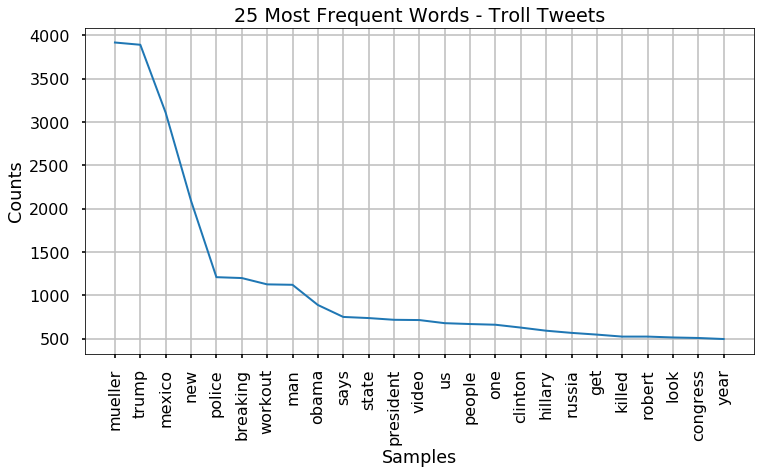

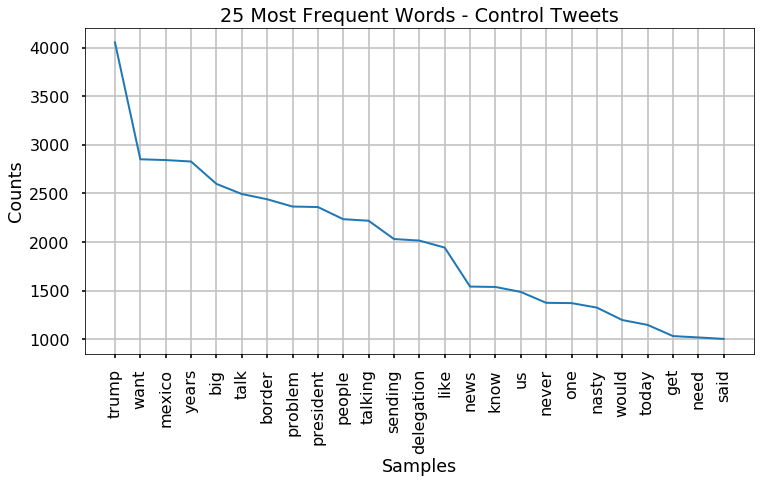

In [162]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


n_most = [range(0)]
with plt.style.context('seaborn-poster'):
    
    mpl.rcParams['figure.figsize']=(12,6)
    plt.title('25 Most Frequent Words - Troll Tweets')
    
    # Get x-ticks, rotate labels, and return
    xticklab1 = ax.get_xticklabels(which = 'both')
    ax.set_xticklabels(labels=xticklab1, rotation=45)    
    
    freq_trolls.plot(25)
    plt.xlabel([])
    plt.title('25 Most Frequent Words - Control Tweets')



    
    freq_controls.plot(25)


### Generating WordClouds

In [193]:
from wordcloud import WordCloud
# wordcloud.stopwords=[]
# wordcloud.collocations=False
max_font_size=100
width=400
height=400
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False

def plot_fit_cloud(troll_cloud,contr_cloud,label1='Control',label2='Troll'):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,18))

    ax[0].imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=40)

    ax[1].imshow(contr_cloud, interpolation='bilinear',)
    # ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=40)
    plt.tight_layout()
    return fig, ax

In [194]:
from PIL import Image

## Twitter Bird masks
mask_f_right = np.array(Image.open('figures/masks/twitter1.png'))
mask_f_left = np.array(Image.open('figures/masks/twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open('figures/masks/Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open('figures/masks/Hashtags and Ats Masks-03.jpg'))
# plt.imshow(mask_hashtag)

dict_keys(['controls', 'trolls']):['tokens']|['text']


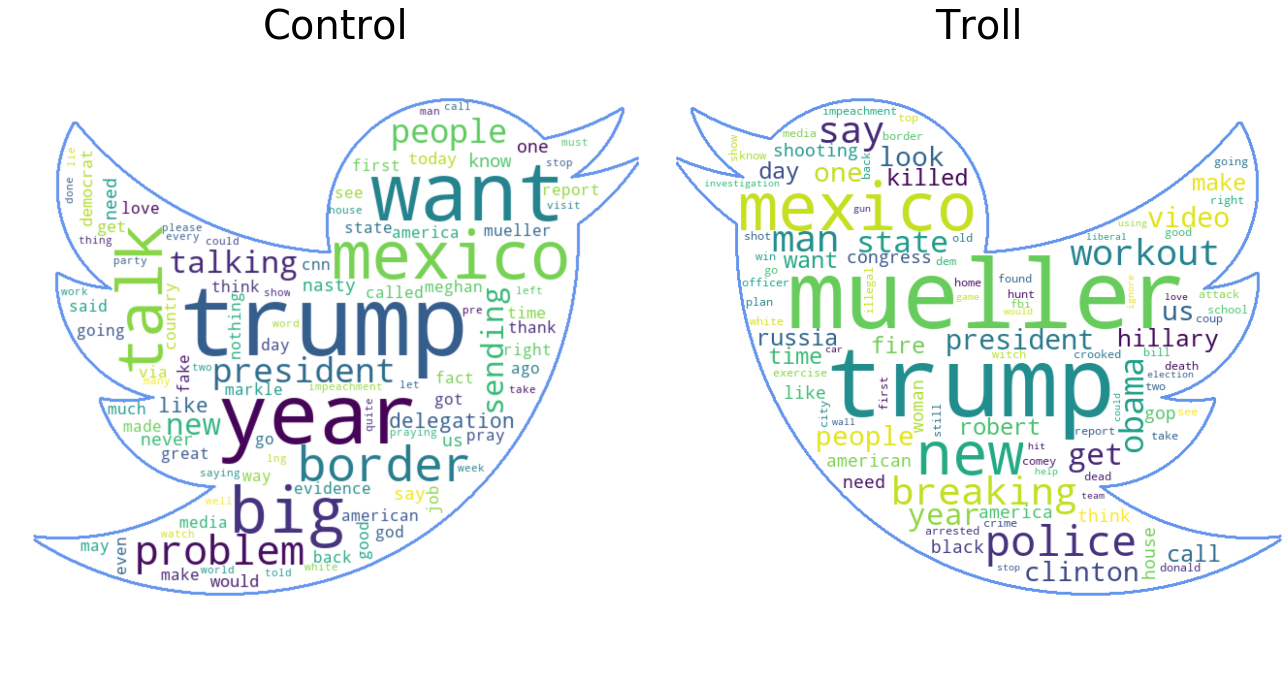

In [195]:
# Create a WordCloud for each group and then plot
troll_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                       mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)

contr_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)


TEXT = get_group_texts_tokens(df_small)
troll_cloud.generate(TEXT['trolls']['text'])
contr_cloud.generate(TEXT['controls']['text'])

fig,ax = plot_fit_cloud(contr_cloud, troll_cloud)

### Lemmatizing

In [184]:
# import nltk
# nltk.download('wordnet')

In [185]:
# from nltk.stem.wordnet import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# troll_lemma = [lemmatizer.lemmatize(w) for w in TEXT['trolls']['tokens']]
# contr_lemma = [lemmatizer.lemmatize(w) for w in TEXT['controls']['tokens']]

# troll_cloud.generate(' '.join(troll_lemma))
# contr_cloud.generate(' '.join(contr_lemma))
# plot_fit_cloud(troll_cloud,contr_cloud)

### Wordclouds for Hashtags

In [196]:
# Issue of empty entries for hashtags interfering with joining.
def empty_lists_to_strings(x):
    """Takes a series and replaces any empty lists with an empty string instead."""
    if len(x)==0:
        return ' '
    else:
        return ' '.join(x) #' '.join(tokens)
    
    
# Apply empty_lists_to_strings    
df_small['hashtag_strings'] = df_small['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

In [197]:
df_small['content_hashtags'][:10]

1272760                  ['#draftdodgingdonny']
1272761                                      []
1272762                                      []
1272763                                      []
1272764                                      []
1272765                                      []
1272766                                      []
1272767                                      []
1272768                             ['#Parler']
1272769    ['#Wikipedia', '#WikipediaFakeInfo']
Name: content_hashtags, dtype: object

In [198]:
## createing a wordcloud for the hashtags section 
from nltk import regexp_tokenize
tags_troll = df_small.groupby('troll_tweet').get_group(1)['content_hashtags']#.apply(lambda x:) #.to_list() 
tags_contr = df_small.groupby('troll_tweet').get_group(0)['content_hashtags']#.to_list()#.str

tags_troll = ' '.join(tags_troll)
tags_contr = ' '.join(tags_contr)

troll_hash_tokens = regexp_tokenize(tags_troll,'(#\w*)')
contr_hash_tokens = regexp_tokenize(tags_contr,'(#\w*)')

In [200]:
# troll_hash_tokens[:5],contr_hash_tokens[:5]

(<Figure size 1296x1296 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000141F7B91B00>,
       dtype=object))

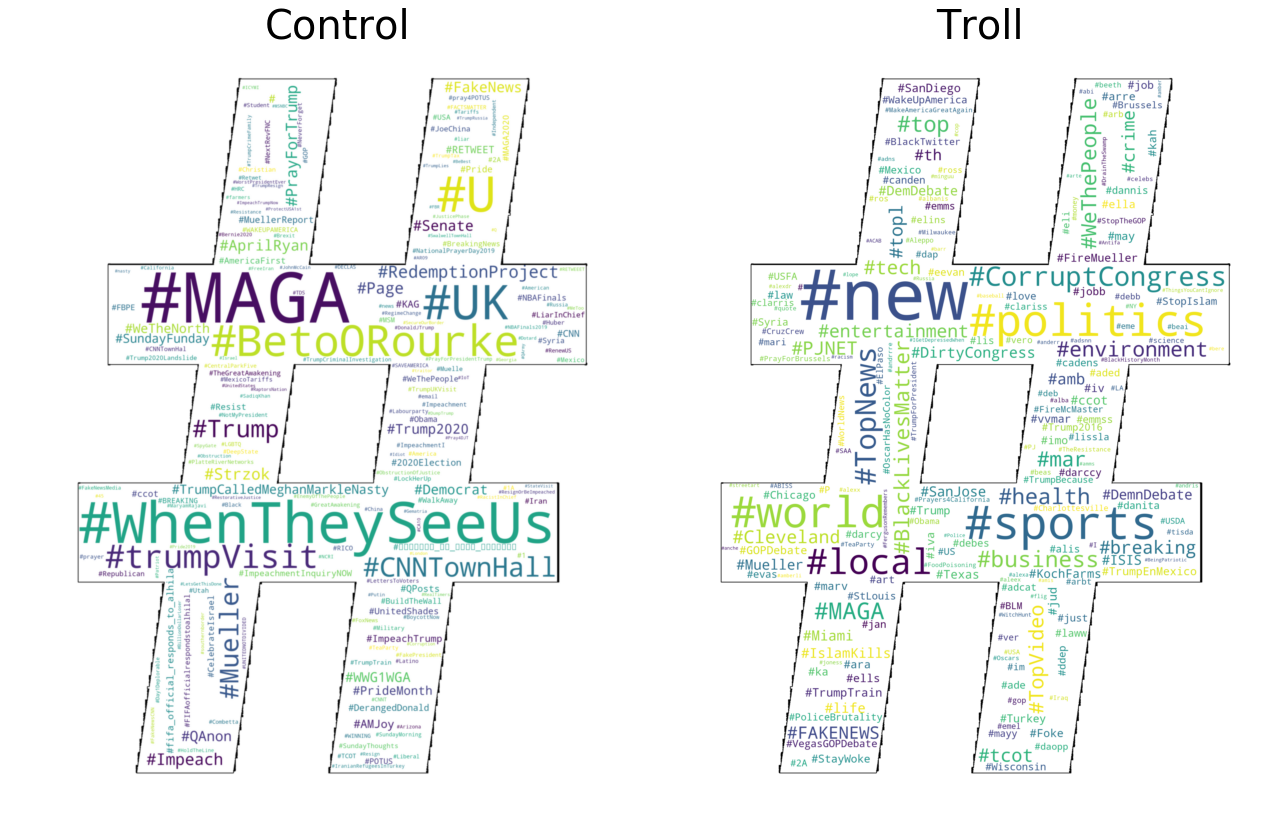

In [201]:
# WordClouds for Hashtags
max_font_size=300
width=400
height=400
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'
# include_numbers =True

contr_tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                            regexp=regexp,mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)

troll_tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                            regexp=regexp, mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


troll_tag_cloud.generate(' '.join(troll_hash_tokens))
contr_tag_cloud.generate(' '.join(contr_hash_tokens))

plot_fit_cloud(contr_tag_cloud, troll_tag_cloud)

### Wordclouds for @'s

In [202]:
## createing a wordcloud for the hashtags section 
from nltk import regexp_tokenize
ats_troll = df_small.groupby('troll_tweet').get_group(1)['content_mentions']#.apply(lambda x:) #.to_list() 
ats_contr = df_small.groupby('troll_tweet').get_group(0)['content_mentions']#.to_list()#.str

tags_troll = ' '.join(ats_troll)
tags_contr = ' '.join(ats_contr)

troll_ats_tokens = regexp_tokenize(tags_troll,'(@\w*)')
contr_ats_tokens = regexp_tokenize(tags_contr,'(@\w*)')
troll_ats_tokens[:10], contr_ats_tokens[:10]

(['@midnight',
  '@Dmarlanawilson',
  '@StMexico',
  '@trainer_juan',
  '@economix101',
  '@bellacharlie',
  '@zangoosite',
  '@lottieryanx',
  '@JPL0UIS',
  '@mexicoodooradio'],
 ['@realDonaldTrump',
  '@realDonaldTrump',
  '@realDonaldTrump',
  '@SpeakerPelosi',
  '@realDonaldTrump',
  '@realDonaldTrump',
  '@jacobsfam',
  '@eugenegu',
  '@realDonaldTrump',
  '@CNN'])

(<Figure size 1296x1296 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000141B234DA58>,
       dtype=object))

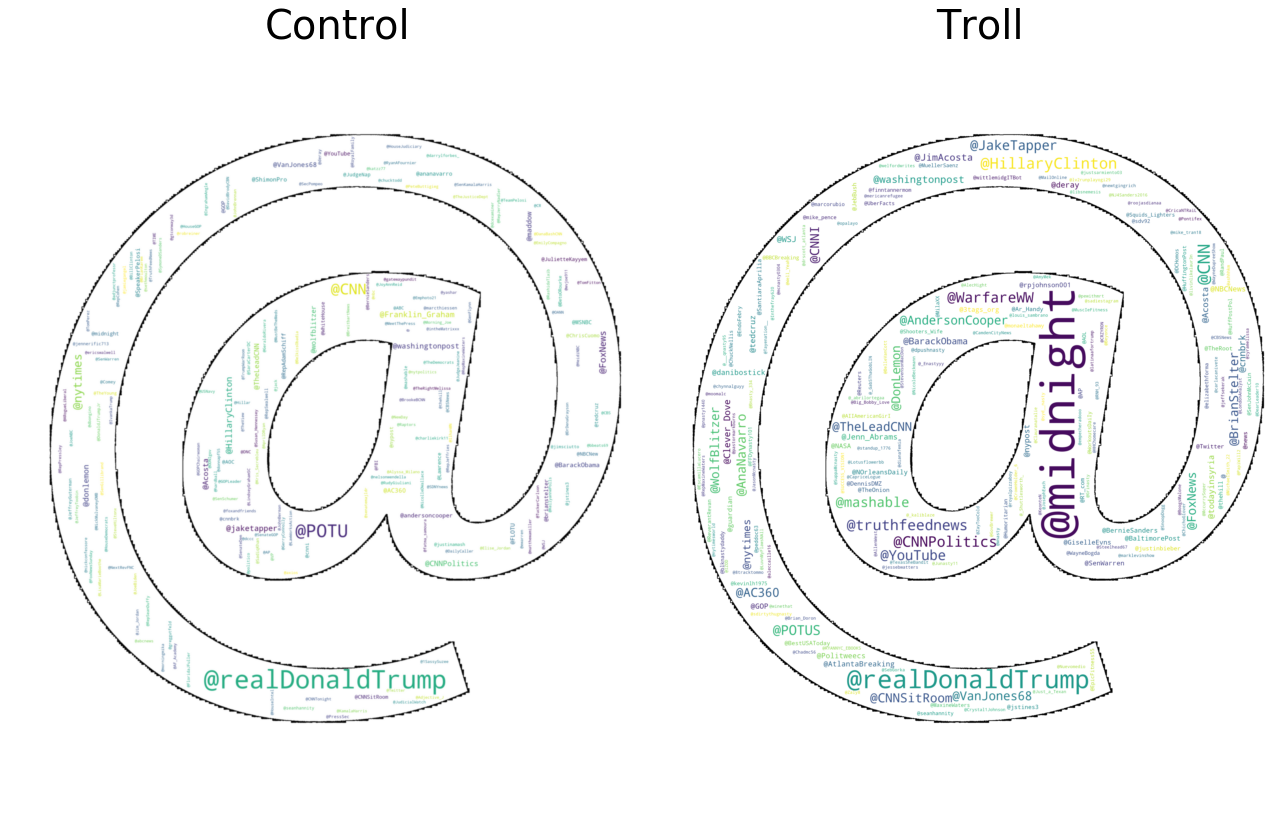

In [207]:
# WordClouds for mENTIONS
max_font_size=200
width=300
height=300
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'
# include_numbers =True

troll_at_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                            regexp=regexp, mask=mask_at, contour_color='black', contour_width=2,
                          prefer_horizontal=0.5)#, include_numbers=True)


contr_at_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations,
                            regexp=regexp,mask=mask_at, contour_color='black', contour_width=2,
                          prefer_horizontal=0.5)#, include_numbers=True)


troll_at_cloud.generate(' '.join(troll_ats_tokens))
contr_at_cloud.generate(' '.join(contr_ats_tokens))

plot_fit_cloud(contr_at_cloud,troll_at_cloud)

# Creating Bigrams and PMI scores

### Bigrams

In [208]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

In [209]:
bigram_measures =BigramAssocMeasures()

troll_finder = BigramCollocationFinder.from_words(TEXT['trolls']['tokens'])
troll_scored = troll_finder.score_ngrams(bigram_measures.raw_freq)

contr_finder = BigramCollocationFinder.from_words(TEXT['controls']['tokens'])
contr_scored = contr_finder.score_ngrams(bigram_measures.raw_freq)

In [218]:
mindex = pd.MultiIndex(levels=[['Control','Troll'],['Bigram','Frequency']],codes=[[0,0,1,1],[0,1,0,1]])

df_1 = jmi.quick_table(contr_scored[:25], col_names =['Bigram','Frequency'],caption='Control Tweet Bigrams', display_df=False);
df_2 = jmi.quick_table(troll_scored[:25], col_names =['Bigram','Frequency'],caption='Troll Tweet Bigrams',display_df=False);

sdf1 = df_1.set_index('Bigram').style.set_caption('Control Tweet Bigrams')
sdf2 = df_2.set_index('Bigram').style.set_caption('Troll Tweet Bigrams')
# df_compare = pd.concat([df_1,df_2],axis=1)
# df_compare.columns=mindex
bs.display_side_by_side(sdf1, sdf2)

,Frequency
Bigram,
"('border', 'problem')",0.00571695
"('big', 'delegation')",0.00569424
"('talking', 'years')",0.0056914
"('sending', 'big')",0.00568572
"('talk', 'border')",0.00568572
"('years', 'want')",0.00568572
"('delegation', 'talk')",0.00568288
"('mexico', 'sending')",0.00568288
"('problem', 'talking')",0.00568288


### Pointwise Mutual Information Score
- Interesting, but heavily influenced by the different time periods.

In [220]:
troll_pmi_finder = BigramCollocationFinder.from_words(TEXT['trolls']['tokens'])
troll_pmi_finder.apply_freq_filter(5)

troll_pmi_scored = troll_pmi_finder.score_ngrams(bigram_measures.pmi)
troll_pmi_df = pd.DataFrame.from_records(troll_pmi_scored[:20],columns=['Bigrams','PMI Score'])

# display(troll_pmi_df.style.set_caption('Troll Tweets'))
sdf1 = troll_pmi_df.set_index('Bigrams').style.set_caption('Troll Tweets')
# quick_table(troll_pmi_scored)

In [221]:
contr_pmi_finder = BigramCollocationFinder.from_words(TEXT['controls']['tokens'])
contr_pmi_finder.apply_freq_filter(5)
contr_pmi_scored = contr_pmi_finder.score_ngrams(bigram_measures.pmi)

# contr_pmi_scored
contr_pmi_df = pd.DataFrame.from_records(contr_pmi_scored[:20], columns=['Bigrams','PMI Score'])

# display(contr_pmi_df.style.set_caption('Control Tweets'))
sdf2 = contr_pmi_df.set_index('Bigrams').style.set_caption('Control Tweets')
bs.display_side_by_side(sdf2, sdf1)

,PMI Score
Bigrams,
"('disappearance', 'connecticut')",16.1045
"('glen', 'tyrone')",16.1045
"('uscis', 'ignor')",16.1045
"('advisers', 'departing')",15.8414
"('babyhands', 'mcgrifter')",15.8414
"('bryan', 'stevenson')",15.8414
"('computer', 'intrusions')",15.8414
"('grounding', 'airline')",15.8414
"('haberman', 'sycophancy')",15.8414


___

# Sentiment Analysis with VADER

In [1]:
# import nltk
# nltk.download('vader_lexicon')

import bs_ds as bs
import mod4functions_JMI as jmi
from bs_ds.imports import *

df_small = pd.read_csv('df_small_equal_phrase_sampled_tweets.csv',encoding='utf-8',index_col=0)


bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# df_tokenize = df_small

# Instantiate sid
sid = SentimentIntensityAnalyzer()

# Create a column of sentiment_scores
df_small['sentiment_scores'] = df_small['content_min_clean'].apply(lambda x: sid.polarity_scores(x))
# Returns:
# {'neg': 0.03, 'neu':0.2, 'pos':0.45, 'compound':0.34}

# To extract the compound scores (overall score)
df_small['compound_score'] = df_small['sentiment_scores'].apply(lambda dict: dict['compound'])

# TO simplify to a sentiment_class
df_small['sentiment_class'] = df_small['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [3]:
# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores', groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)

#     troll_tweet = pd.Series(df[groupby_col])

#     group_scores = pd.concat([troll_tweet,series_pos, series_neu, series_neg], axis=1)  
#     group_scores.set_index(df.index)
#     group_scores.columns = [['troll_tweet','pos','neu','neg']]
    
    return df

In [4]:
compound_scores = get_group_sentiment_scores(df_small)

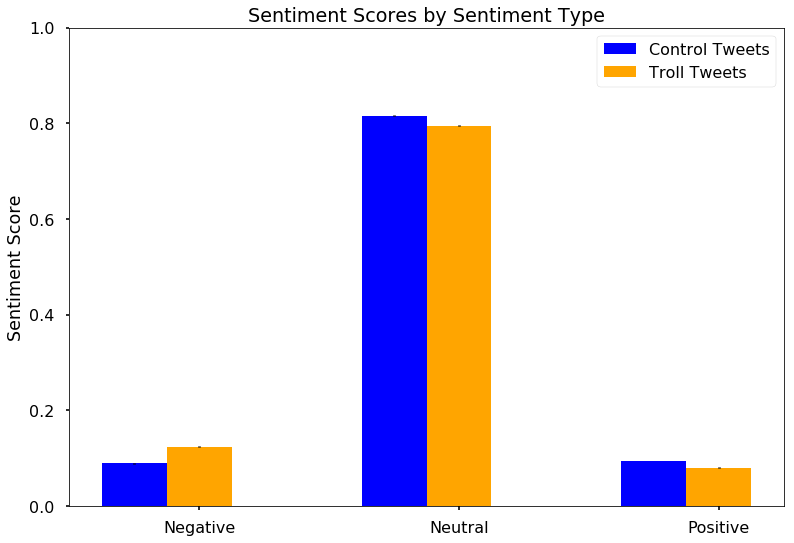

In [67]:
with plt.style.context('seaborn-poster'):
    fig,ax =plt.subplots()
    from scipy.stats import sem
    df_troll_res = compound_scores.groupby('troll_tweet')['neg','neu','pos'].get_group(1)
    df_contr_res = compound_scores.groupby('troll_tweet')['neg','neu','pos'].get_group(0)

    y_bars1 = np.mean(df_contr_res[['neg','neu','pos']])
    y_errbars1 = sem(df_contr_res[['neg','neu','pos']])
    y_bars2 = np.mean(df_troll_res[['neg','neu','pos']])
    y_errbars2 = sem(df_troll_res[['neg','neu','pos']])

    bar_width = 0.25
    bar1 = np.arange(len(y_bars1))
    bar2 = [x + bar_width for x in bar1]

    # bar_labels = bar1+0.5
    # bar3 = [x + bar_width for x in bar2]

    ax.bar(x=bar1,height=y_bars1, color='blue', width=bar_width, label = 'Control Tweets',yerr=y_errbars1)

    ax.bar(x=bar2,height=y_bars2,color='orange', width=bar_width, label ='Troll Tweets', yerr=y_errbars2)
    plt.ylim([0,1])
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Scores by Sentiment Type')
    plt.xticks([r + bar_width for r in range(len(y_bars1))],['Negative','Neutral','Positive'])
    plt.legend()

# RETURN HERE TO PLOT THE COMPOUND SENTIMENT SCORES

In [56]:
plot_troll_sent = df_small.groupby('troll_tweet').get_group(1)['sentiment_class'].value_counts()
plot_contr_sent = df_small.groupby('troll_tweet').get_group(0)['sentiment_class'].value_counts()

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_troll_sent_norm = plot_troll_sent/(sum(plot_troll_sent))
print('\tNormalized Troll Classes:\n',plot_troll_sent_norm)

# Normalized % of control sentiment classes
plot_contr_sent_norm = plot_contr_sent/(sum(plot_contr_sent))
print('\n\tNormalized Control Classes:\n',plot_contr_sent_norm)

RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:
 ------------------------------------------------------------
	Normalized Troll Classes:
 pos    0.613535
neg    0.386465
Name: sentiment_class, dtype: float64

	Normalized Control Classes:
 pos    0.598126
neg    0.401874
Name: sentiment_class, dtype: float64


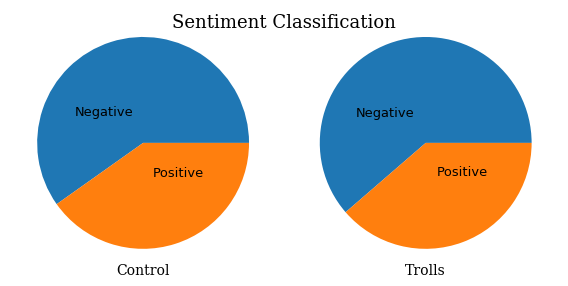

In [57]:
with plt.style.context('seaborn-talk'):
    fig, ax= plt.subplots(nrows=1,ncols=2, figsize=(8,6))

    wedgeprops={'linewidth':1,'edgecolor':'k'}
    textprops={'fontsize':12,'weight':75}#'family':'serif'}
    fontTitle={'fontsize':14,'family':'serif'}
    fontSuptitle={'fontsize':25,'weight':'bold','family':'serif'}
    group_labels = ['Negative','Positive']
    slice_colors = ['coral','steelblue']

    fig.suptitle('Sentiment Classification',y=0.8,fontsize=18,family='serif') #fontdict=fontSuptitle,y=.8)

    ax[0].pie(plot_contr_sent_norm,labels=group_labels, labeldistance=0.3)
#     ax[0].pie(plot_contr_sent_norm, labels=group_labels, colors=slice_colors, labeldistance=0.3, 
#              wedgeprops=wedgeprops, textprops=textprops)

    ax[0].set_title('Control',fontdict=fontTitle,y=-0.02)
    ax[1].pie(plot_troll_sent_norm, labels=group_labels, labeldistance=0.3)
#     ax[1].pie(plot_troll_sent_norm, labels=group_labels,colors=slice_colors, labeldistance=0.3,
#              wedgeprops=wedgeprops, textprops=textprops)

    ax[1].set_title('Trolls', fontdict=fontTitle,y=-0.02)
    # ax[0].legend()
    fig.tight_layout()

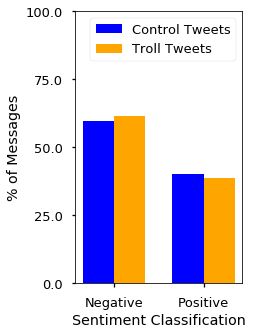

In [69]:
# Plot sentiment analysis classification
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(3,5))
    width=0.35
    ind = np.arange(0,2)
    # ax.set_aspect(0.9)
    ax.bar(ind, height=plot_contr_sent_norm, width=width, 
           label='Control Tweets',color='b')#,edgecolor='k')
    ax.bar(ind+width, height=plot_troll_sent_norm,width=width,
           label='Troll Tweets',color='orange')#,edgecolor='k')
    ax.set_ylim(0,1)

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['Negative','Positive'])
    ax.set_xlabel('Sentiment Classification')

    y_ticks = np.linspace(0,1,num=5)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks*100)
    ax.set_ylabel('% of Messages')
    ax.legend()
    ax.autoscale_view()

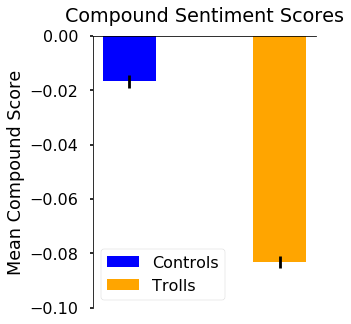

In [73]:
with plt.style.context('seaborn-poster'):
    import seaborn as sns

    # Plot sentiment analysis compound scores
    plot_troll_comp = df_small.groupby('troll_tweet').get_group(1)['compound_score'].values
    plot_contr_comp = df_small.groupby('troll_tweet').get_group(0)['compound_score'].values

    # Plot sentiment ompound scores
    from scipy.stats import sem
    fig, ax = plt.subplots(figsize=(4,5))

    width=0.35
    ind = np.arange(0,2)

    # sns.boxplot(df_small.groupby('troll_tweet')['compound_score'].mean())
    ax.bar(ind[0],height=plot_contr_comp.mean(), yerr=sem(plot_contr_comp), width=width, 
           label='Controls',color='b')#,edgecolor='k')
    ax.bar(ind[1],height=plot_troll_comp.mean(),yerr=sem(plot_troll_comp),width=width,
           label='Trolls',color='orange')#,edgecolor='k')
    ax.legend()#loc='upper right')
    ax.set_xticks([])
    # ax.set_xticklabels(['Negative','Positive'])
    ax.set_title('Compound Sentiment Scores',y=1.03)
    ax.set_ylabel('Mean Compound Score')
    # y_ticks = np.linspace(0,1,num=5)
    # ax.set_yticks(y_ticks)
    # ax.set_yticklabels(y_ticks*100)
    # ax.set_ylabel('% of Messages')
    # ax.legend()
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim([-0.1,0])
    # ax.autoscale_view()

# BOOKMARK - LOAD HERE -  -  - Starting with Keras

In [226]:
import bs_ds as bs
from bs_ds.imports import *
import mod4functions_JMI as jmi

In [227]:
# PAUSE
# df_small.to_csv('df_ready_for_keras_06082019.csv', encoding='utf-8')
# jmi.ask_user_to_save(df_small, 'df_ready_for_keras_06072019.csv',encoding='utf-8',ask=True, overwrite=True)
# df_small = pd.read_csv('df_ready_for_keras_06072019.csv',encoding='utf-8')

## Switching to Bigger-Picture Metrics 

## Vectorization
- to do these tasks, must do tokenziation and other cleaning steps in the original dataframe so structure/context is not lost

- for this section, we will leave the hashtags and @'s in the messages, and will only remove url links
- will leave stopwords in for now

### Using Word2Vec

In [74]:
def get_group_sentences(df_small, groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}, column='tokens_stopped'):
    group_sentences = {}
    for k,v in group_dict.items():
        group_sentences[v] = df_small.groupby(groupby_col).get_group(k)[column]
    print(group_sentences.keys())
    return group_sentences

In [281]:
SENTS = get_group_sentences(df_small)
# SENTS['controls']

dict_keys(['controls', 'trolls'])


In [280]:
from gensim.models import Word2Vec
SENTS = get_group_sentences(df_small)

troll_tokenized_content = SENTS['trolls'] #df_small.groupby('troll_tweet').get_group(1)['tokens_stopped']
contr_tokenized_content = SENTS['controls']#df_small.groupby('troll_tweet').get_group(0)['tokens_stopped']

troll_model = Word2Vec(troll_tokenized_content, size=100, window=5, min_count=1, workers=4)
contr_model = Word2Vec(contr_tokenized_content, size=100, window=5, min_count=1, workers=4)

troll_model.train(troll_tokenized_content, total_examples=troll_model.corpus_count, epochs=10 )
contr_model.train(contr_tokenized_content, total_examples=contr_model.corpus_count, epochs=10 )

wv_troll = troll_model.wv
wv_contr = contr_model.wv

dict_keys(['controls', 'trolls'])


In [279]:
wv_troll.vocab
# len(wv_troll.vocab),len(wv_contr.vocab)

{'[': <gensim.models.keyedvectors.Vocab at 0x219e34d9278>,
 "'": <gensim.models.keyedvectors.Vocab at 0x219c4851a20>,
 'w': <gensim.models.keyedvectors.Vocab at 0x219ae2f07f0>,
 'e': <gensim.models.keyedvectors.Vocab at 0x219ae2f0048>,
 'a': <gensim.models.keyedvectors.Vocab at 0x219ae2f0cf8>,
 'l': <gensim.models.keyedvectors.Vocab at 0x219ae2f0748>,
 't': <gensim.models.keyedvectors.Vocab at 0x219cf5e51d0>,
 'h': <gensim.models.keyedvectors.Vocab at 0x219d86bcc50>,
 ',': <gensim.models.keyedvectors.Vocab at 0x219d86bcf98>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x219d86bce80>,
 'i': <gensim.models.keyedvectors.Vocab at 0x219d86bcd68>,
 'k': <gensim.models.keyedvectors.Vocab at 0x219d86bc7f0>,
 'n': <gensim.models.keyedvectors.Vocab at 0x219d86bcb38>,
 'r': <gensim.models.keyedvectors.Vocab at 0x219d86bca20>,
 'u': <gensim.models.keyedvectors.Vocab at 0x219d86bc908>,
 's': <gensim.models.keyedvectors.Vocab at 0x219d86bf208>,
 'm': <gensim.models.keyedvectors.Vocab at 0x219d86bf320

# BOOKMARK - EXPLORE SIMILAR WORDS

In [263]:
wv_contr.

In [268]:
def f(x):
    return list(x)

In [269]:
interact(f, x=freq_trolls.keys())

interactive(children=(Dropdown(description='x', options=('wealth', 'like', 'want', 'ruins', 'many', 'quite', '…

<function __main__.f(x)>

In [266]:
words_to_check = wv_contr.vocab.keys()

In [267]:
## PRINT OUT SIMILAR WORDS
# words_to_check = ['trump','democrat','vote']
@interact(words_to_check=words_to_check)
def display(words_to_check):
#     for word in words_to_check:
        word=words_to_check
        print(f'\n{word.upper()}', '----'*20)

#         if word in wv_troll.vocab:

        df_compare = jmi.quick_table( wv_troll.most_similar(word),
                                         col_names = [' Similar Word','Similarity Score'],
                                         caption = f'Trolls Tweets: Words Similar to "{word:>{300}}""...')
        display(df_compare)
    #         print(f"\nTroll:{word}:\n\t{wv_troll.most_similar(word)}")

#         if word in wv_contr.vocab:
#             pass
            #print(f"\nControl: {word}:\n\t{wv_contr.most_similar(word)}")    

interactive(children=(Dropdown(description='words_to_check', options=('p', 'e', 'r', 'f', 'c', 't', 'l', 'y', …


___

- naming scheme changing: df_small -> df_tokenize

# BUILDING THE MODELS

In [40]:
# df_tokenize = df_small

In [108]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
mpl.rcParams['figure.figsize']=(10,8)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Keras neural network basics
from keras import models
from keras import layers
from keras import optimizers

In [308]:
# # df = pd.read_csv('df_tweets_tokens_text_for_vectors.csv')

# df.set_index('date_published',inplace=True)
# df.head()
# tweets = df['']

In [309]:
# df.head()

In [109]:
bs.inspect_df(df_tokenize)

<class 'pandas.core.frame.DataFrame'>
Index: 2545694 entries, 2017-10-01 19:58:00 to 2019-06-02 06:49:46
Data columns (total 23 columns):
account_category      object
account_type          object
author                object
content               object
external_author_id    float64
followers             float64
following             float64
language              object
post_type             object
publish_date          object
region                object
retweet               int64
troll_tweet           int64
updates               float64
content_raw           object
has_RT                bool
starts_RT             bool
content_starts_RT     object
content_min_clean     object
content_hashtags      object
content_mentions      object
content_stopped       object
tokens_stopped        object
dtypes: bool(2), float64(4), int64(2), object(15)
memory usage: 432.1+ MB


None

,Null values,Total Values,Percent
Column,,,
account_category,0,2545694,0
account_type,346,2545694,0.014
author,0,2545694,0
content,0,2545694,0
external_author_id,0,2545694,0
followers,0,2545694,0
following,1272847,2545694,50
language,0,2545694,0
post_type,1272847,2545694,50


,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,retweet,troll_tweet,updates,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped
date_published,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 19:58:00,RightTroll,Right,10_GOP,"""We have a sitting Democrat US Senator on tria...",9.0600e+17,9636.0,1052.0,English,NaN,10/1/2017 19:58,Unknown,0,1,253.0,"""We have a sitting Democrat US Senator on tria...",False,False,[],"""We have a sitting Democrat US Senator on tria...",[],['@nedryun'],sitting democrat us senator trial corruption b...,"['sitting', 'democrat', 'us', 'senator', 'tria..."
2017-10-01 22:43:00,RightTroll,Right,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,9.0600e+17,9637.0,1054.0,English,NaN,10/1/2017 22:43,Unknown,0,1,254.0,Marshawn Lynch arrives to game in anti-Trump s...,False,False,[],Marshawn Lynch arrives to game in anti-Trump s...,[],[],marshawn lynch arrives game anti trump shirt j...,"['marshawn', 'lynch', 'arrives', 'game', 'anti..."
2017-10-01 23:52:00,RightTroll,Right,10_GOP,JUST IN: President Trump dedicates Presidents ...,9.0600e+17,9642.0,1062.0,English,NaN,10/1/2017 23:52,Unknown,0,1,256.0,JUST IN: President Trump dedicates Presidents ...,False,False,[],JUST IN: President Trump dedicates Presidents ...,[],[],president trump dedicates presidents cup golf ...,"['president', 'trump', 'dedicates', 'president..."


In [311]:
len(df_tokenize)

75564

## Creating a Baseline Model with Logistic Regression

### Train, test, val split

In [110]:
df_tokenize['troll_tweet'].value_counts()

1    1272847
0    1272847
Name: troll_tweet, dtype: int64

In [111]:
df_tokenize.dropna(subset=['content_stopped'],inplace=True)

In [112]:
# SELECTING X AND Y
y = df_tokenize['troll_tweet'] #.values
X_array = df_tokenize['content_stopped'].values
y.shape, X_array.shape

((2523998,), (2523998,))

In [113]:
# TRAIN-TEST-VAL SPLIT
from mod4functions_JMI import train_test_val_split
sentences_train, sentences_test, sentences_val, y_train, y_test, y_val = train_test_val_split(X_array,y)

In [114]:
### Vectorization
chosen_vectorizer = 'count' #of tfidf

if chosen_vectorizer.lower()=='count':
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    
elif chosen_vectorizer.lower()=='tfidf':
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    vectorizer.fit(sentences_train)
else:
    raise Exception('No vectorizer chosen')

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_val = vectorizer.transform(sentences_val)

In [115]:
X_train.shape, X_test.shape

((1766798, 134079), (504800, 134079))

Clock created at 06/11/19 - 06:36:18 PM.
Clock started at 06/11/19 - 06:36:18 PM


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


	Lap #1 done @ 06/11/19 - 06:38:25 PM	label: LogisticRegression complete.	duration: 127.107002 sec)
Total Time: 0:02:07.107002.

               precision    recall  f1-score   support

           0       0.92      0.95      0.94    251810
           1       0.95      0.92      0.94    252990

   micro avg       0.94      0.94      0.94    504800
   macro avg       0.94      0.94      0.94    504800
weighted avg       0.94      0.94      0.94    504800

Normalized confusion matrix
[[0.95270641 0.04729359]
 [0.07704652 0.92295348]]


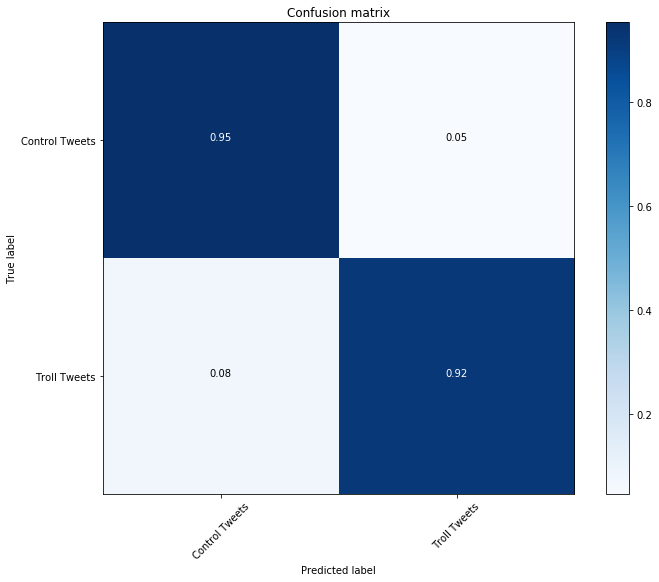


Train Accuracy:  0.9431061162623005
Test Accuracy:  0.9377951664025357


In [116]:
import bs_ds as bs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

# Timing model
clock_logreg = bs.Clock(verbose=1)
clock_logreg.tic('Starting LogisticRegression')


clf = LogisticRegression()
clf.fit(X_train, y_train)

score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
clock_logreg.toc('LogisticRegression complete.')



y_hat_test = clf.predict(X_test)
print('\n',classification_report(y_test, y_hat_test))

# Adding plot auc-roc 
import bs_ds as bs
# bs.plot_auc_roc_curve(y_test, y_hat_test)

bs.plot_confusion_matrix(confusion_matrix(y_test, y_hat_test),['Control Tweets','Troll Tweets'],normalize=True);
print("\nTrain Accuracy: ",score_train)
print("Test Accuracy: ",score_test)

### INITIAL MODEL SUMMARY: Logistic Regression
- Accuracy: 
    - 0.93 for train set
    - 0.87 for test set
- Recall/Precision/F1-scores all around 0.87

- Duration: 
    - 0.92 sec


# Tesing a DecisionTreeClassifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy')

In [118]:
dt_clock=bs.Clock()
dt_clock.tic('')

dt_clf.fit(X_train,y_train)

dt_clock.toc('')

Clock created at 06/11/19 - 06:39:29 PM.
	Start: clock.tic()	Mark lap: clock.lap()	Stop: clock.toc()

Clock started at 06/11/19 - 06:39:29 PM
	Lap #1 done @ 06/11/19 - 07:39:26 PM	label:                     	duration: 3597.344999 sec)
Total Time: 0:59:57.344999.


,Start Time,Start Label,Stop Time,Stop Label,Duration
Lap #,,,,,
1,06/11/19 - 06:39:29 PM,,06/11/19 - 07:39:26 PM,,3597.344999
Start-End,06/11/19 - 06:39:29 PM,,06/11/19 - 07:39:26 PM,Total Time:,3597.344999


Normalized confusion matrix
[[9.99702156e-01 2.97843612e-04]
 [6.19550180e-02 9.38044982e-01]]


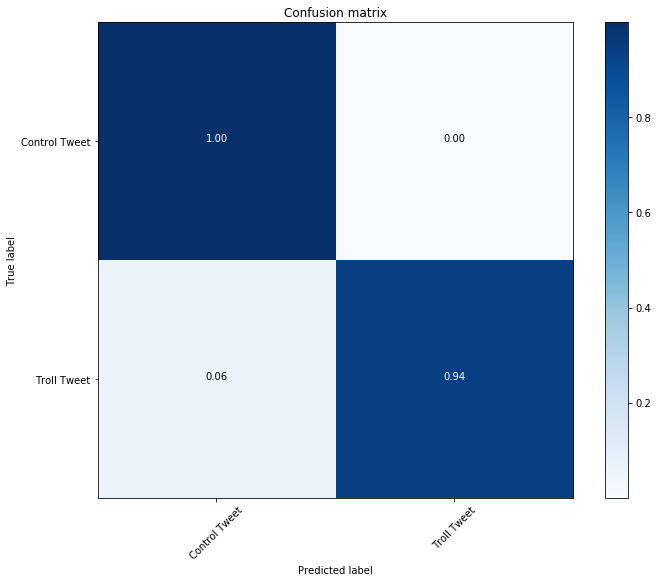


Train Accuracy:  0.9431061162623005
Test Accuracy:  0.9688015055467512


In [119]:
y_hat_train = dt_clf.predict(X_train)
y_hat_test = dt_clf.predict(X_test)

score_test = accuracy_score(y_test, y_hat_test)
core_train= accuracy_score(y_train, y_hat_train)

labels=['Control Tweet','Troll Tweet']
cm = confusion_matrix(y_test, y_hat_test)
bs.plot_confusion_matrix(cm,classes=labels, normalize=True)

print("\nTrain Accuracy: ",score_train)
print("Test Accuracy: ",score_test)


### Plotting Feature Importance

In [120]:
## Getting Feature Importances
feat_names = vectorizer.get_feature_names()
feat_import = dt_clf.feature_importances_
important_features = pd.Series(feat_import, index=feat_names)

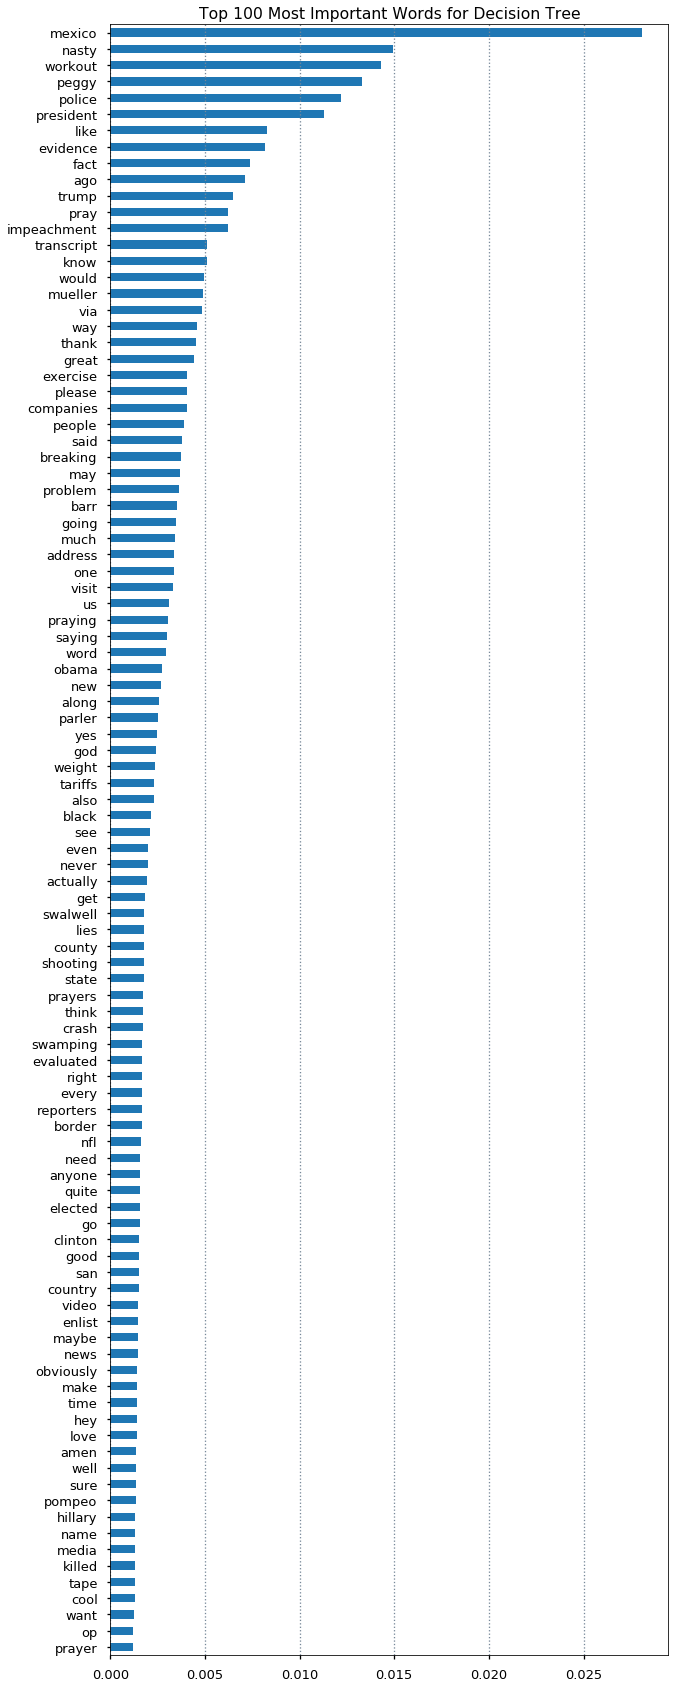

In [121]:
# Plot the top 100 most important words
top100 = important_features.sort_values(ascending=False)[:100]

with plt.style.context('seaborn-talk'):
    fig = top100.sort_values().plot(kind='barh', figsize=(10,30))
    plt.title('Top 100 Most Important Words for Decision Tree')
    plt.grid('on', axis='x',color='lightslategray', ls=':')

In [348]:
bs.html_on()


In [122]:
top_words_to_check = top100.index
df_results = check_dfs_for_exp_list(df_tokenize.groupby('troll_tweet').get_group(0),df_tokenize.groupby('troll_tweet').get_group(1), top_words_to_check)
dfs =bs.color_scale_columns(df_results.sort_values('Troll Tweets', ascending=False))
dfs

For mexico:
	Control tweets: 239
	Troll tweets: 38

For nasty:
	Control tweets: 37658
	Troll tweets: 474

For workout:
	Control tweets: 12709
	Troll tweets: 37582

For peggy:
	Control tweets: 234
	Troll tweets: 16

For police:
	Control tweets: 2613
	Troll tweets: 26139

For president:
	Control tweets: 23042
	Troll tweets: 8870

For like:
	Control tweets: 61831
	Troll tweets: 19972

For evidence:
	Control tweets: 23993
	Troll tweets: 895

For fact:
	Control tweets: 33034
	Troll tweets: 3592

For ago:
	Control tweets: 25805
	Troll tweets: 12411

For trump:
	Control tweets: 18202
	Troll tweets: 2296

For pray:
	Control tweets: 36707
	Troll tweets: 2574

For impeachment:
	Control tweets: 16898
	Troll tweets: 421

For transcript:
	Control tweets: 15272
	Troll tweets: 153

For know:
	Control tweets: 60524
	Troll tweets: 12785

For would:
	Control tweets: 37780
	Troll tweets: 9283

For mueller:
	Control tweets: 739
	Troll tweets: 18

For via:
	Control tweets: 23971
	Troll tweets: 7663

For wa

AttributeError: 'NoneType' object has no attribute 'sort_values'

In [326]:
# bs.viz_tree(dt_clf)

## Testing a Random Forest Classifier


In [327]:
from sklearn.ensemble import RandomForestClassifier

rf_clock=bs.Clock()

Clock created at 06/09/19 - 03:31:19 AM.
	Start: clock.tic()	Mark lap: clock.lap()	Stop: clock.toc()



Clock started at 06/09/19 - 03:31:19 AM
	Lap #1 done @ 06/09/19 - 03:33:36 AM	label: Accuracy:0.8075167074703897	duration: 136.985001 sec)
Total Time: 0:02:16.985001.
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7615
           1       0.91      0.73      0.81      7498

   micro avg       0.83      0.83      0.83     15113
   macro avg       0.84      0.83      0.83     15113
weighted avg       0.84      0.83      0.83     15113

Normalized confusion matrix
[[0.92895601 0.07104399]
 [0.27167245 0.72832755]]


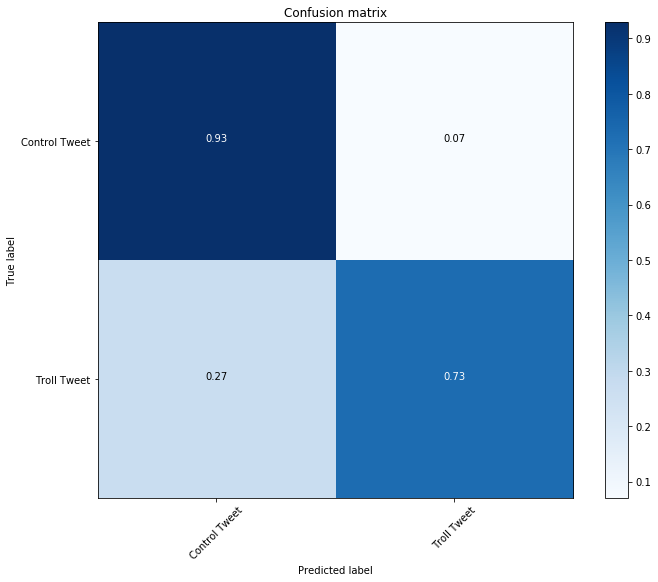


Train Accuracy:  0.9333950920709343
Test Accuracy:  0.8294183815258387


In [328]:
rf_clock.tic('Starting Random Forsest clf')
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_hat_train = rf_clf.predict(X_train)
y_hat_test = rf_clf.predict(X_test)
rf_clock.toc(f'Accuracy:{score_test}')


score_test = accuracy_score(y_test, y_hat_test)
core_train= accuracy_score(y_train, y_hat_train)

print(classification_report(y_test, y_hat_test))

labels=['Control Tweet','Troll Tweet']
cm = confusion_matrix(y_test, y_hat_test)
bs.plot_confusion_matrix(cm,classes=labels, normalize=True)

print("\nTrain Accuracy: ",score_train)
print("Test Accuracy: ",score_test)

## Keras Model 1: creating a Text Classification Neural Network in Keras
- Using CountVectorized data generated above

In [329]:
## HOW THE USED DATA WAS CREATED ABOVE

#from mod4functions_JMI import train_test_val_split
#sentences_train, sentences_test, sentences_val, y_train, y_test, y_val = train_test_val_split(X_array,y)

# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# vectorizer.fit(sentences_train)

# X_train = vectorizer.transform(sentences_train)
# X_test = vectorizer.transform(sentences_test)
# X_val = vectorizer.transform(sentences_val)

In [330]:
from keras import models, layers, optimizers
input_dim = X_train.shape[1]
# input_dim = sequences_train.shape[1]
print(input_dim)

model1 = models.Sequential()
# model.add(layers.Embedding)

model1.add(layers.Dense(10, input_dim= input_dim, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.summary()

31555
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                315560    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 315,571
Trainable params: 315,571
Non-trainable params: 0
_________________________________________________________________


### Running model 1 with Keras NOTES:
1. When running `history = model1.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_val, y_val), batch_size=100)`, result was 0.88 val accuracy, 107 sec
2. WHen running `history = model1.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_val, y_val), batch_size=200)`, result was 0.87 val accuracy in 97 sec


In [331]:
clock = bs.Clock()
clock.tic('starting keras .fit')

num_epochs = 10
history = model1.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_data=(X_val, y_val), batch_size=200)

clock.toc(f'completed {num_epochs} epochs')

Clock created at 06/09/19 - 03:33:37 AM.
	Start: clock.tic()	Mark lap: clock.lap()	Stop: clock.toc()

Clock started at 06/09/19 - 03:33:37 AM
Instructions for updating:
Use tf.cast instead.
Train on 52894 samples, validate on 7557 samples
Epoch 1/10
52894/52894 [==============================] - 18s 343us/step - loss: 0.4914 - acc: 0.8180 - val_loss: 0.3653 - val_acc: 0.8495
Epoch 2/10
52894/52894 [==============================] - 18s 344us/step - loss: 0.2972 - acc: 0.8781 - val_loss: 0.3068 - val_acc: 0.8666
Epoch 3/10
52894/52894 [==============================] - 19s 362us/step - loss: 0.2335 - acc: 0.9052 - val_loss: 0.2920 - val_acc: 0.8675
Epoch 4/10
52894/52894 [==============================] - 18s 340us/step - loss: 0.1968 - acc: 0.9216 - val_loss: 0.2910 - val_acc: 0.8691
Epoch 5/10
52894/52894 [==============================] - 18s 342us/step - loss: 0.1711 - acc: 0.9335 - val_loss: 0.2958 - val_acc: 0.8685
Epoch 6/10
52894/52894 [==============================] - 19s 350u

,Start Time,Start Label,Stop Time,Stop Label,Duration
Lap #,,,,,
1,06/09/19 - 03:33:37 AM,starting keras .fit,06/09/19 - 03:36:42 AM,completed 10 epochs,185.345366
Start-End,06/09/19 - 03:33:37 AM,starting keras .fit,06/09/19 - 03:36:42 AM,Total Time:,185.345366


In [332]:
# display

In [333]:
# WILL BE REPLACED WITH plot_keras_history in mod4
def plot_history(history):
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
    ax[0].plot(x, acc,'b',label='Training Acc')
    ax[0].plot(x, val_acc,'r',label='Validation Acc')
    ax[0].legend()
    ax[1].plot(x, loss,'b',label='Training Loss')
    ax[1].plot(x, val_loss, 'r', label='Validation Loss')
    ax[1].legend()
    plt.show()

In [334]:
# plot_h

In [335]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print(f'Training Accuracy:{accuracy}')

loss, accuracy = model1.evaluate(X_test, y_test, verbose=True)
print(f'Testing Accuracy:{accuracy}')

52894/52894 [==============================] - 16s 307us/step
Training Accuracy:0.9667826218474685
15113/15113 [==============================] - 5s 301us/step
Testing Accuracy:0.8668034142869854


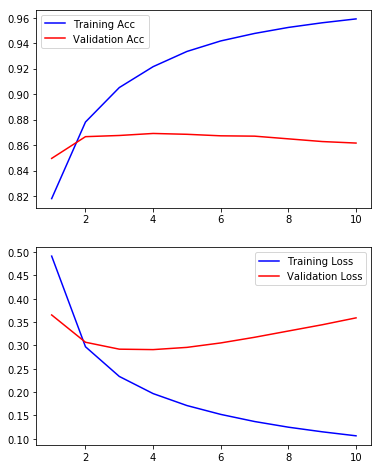

In [336]:
plot_history(history)

In [432]:
# plot_history(history)

In [433]:
# from keras.utils import plot_model
# plot_model(model1, show_shapes=True,to_file='model1.png')

# from IPython.display import SVG
# from keras.utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# model1_img =plt.imread('model1.png')
# plt.imshow(model1_img)

### Summary - Neural Network Analysis on CountVectorized Tweets



## Keras Model 2 Adding pretrained Word2Vec embeddings
- Adding Word2Vec vectorization into an embedding layer

### A: How to get a word2vector model's vectors into a Keras Embedding Layer


https://sturzamihai.com/how-to-use-pre-trained-word-vectors-with-keras/

In [46]:
import mod4functions_JMI as jmi

In [49]:
df_tokenize.head()

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,...,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped,hashtag_strings
date_published,,,,,,,,,,,,,,,,,,,,,
2014-11-28 08:15:00,HashtagGamer,Hashtager,CALEBPAAR,Wealth like want ruins many,2.535353e+09,52.0,65.0,English,NaN,11/28/2014 8:15,...,Wealth like want ruins many,False,False,[],Wealth like want ruins many,[],[],wealth like want ruins many,"['wealth', 'like', 'want', 'ruins', 'many']",[ ]
2016-07-10 02:07:00,RightTroll,Right,RIGHTNPR,Quite simple!,4.311372e+09,5234.0,5400.0,English,NaN,7/10/2016 2:07,...,Quite simple! https://t.co/cTjVF6Fmta,False,False,[],Quite simple!,[],[],quite simple,"['quite', 'simple']",[ ]
2016-04-11 13:57:00,HashtagGamer,Hashtager,DANAGEEZUS,' how is it supposed to work?!',2.882037e+09,16439.0,11263.0,English,NaN,4/11/2016 13:57,...,'@sfpodge how is it supposed to work?!',False,False,[],'@sfpodge how is it supposed to work?!',[],['@sfpodge'],supposed work,"['supposed', 'work']",[ ]
2015-07-27 22:16:00,Commercial,Commercial,FINDDIET,Has the workout schedule changed?,3.254274e+09,136.0,3.0,English,NaN,7/27/2015 22:16,...,http://t.co/dj3dSJ2IGK Has the workout schedul...,False,False,[],Has the workout schedule changed? @LeDrunken...,[],"['@LeDrunkenHippie', '@Hausrath05', '@_24dayda...",workout schedule changed,"['workout', 'schedule', 'changed']",[ ]
2017-06-23 22:13:00,NewsFeed,local,TODAYCINCINNATI,Reds notes: Brandon Finnegan could return Mond...,2.577082e+09,17437.0,5516.0,English,NaN,6/23/2017 22:13,...,Reds notes: Brandon Finnegan could return Mond...,False,False,[],Reds notes: Brandon Finnegan could return Mond...,[],[],reds notes brandon finnegan could return monda...,"['reds', 'notes', 'brandon', 'finnegan', 'coul...",[ ]


In [48]:
jmi.display_random_tweets(df_tokenize, display_cols=['content_min_clean','tokens_stopped'])

,index,text
date_published,,
2015-07-06 04:20:00,22768,Goal not achieved bigbelly must pay attention to nouriture and practice more cardio fitness gym @sylxvia @BurnUhBay
2019-06-02 18:20:39,48030,....U.S. in order to avoid paying the 25% Tariff. Like Mexican companies will move back to the United States once the…
2019-06-02 21:30:43,73679,@TortuguitaSi @nytimes @Acosta The Acosta video was NOT manipulated. That just fiction. The video you're referring to was slowed down to show exactly what Acosta did. You all are so easily manipulated is truly sad
2019-06-02 23:54:29,68252,"GOP Rep. Steve King of Iowa, seeking to bat away allegations of racism by an angry constituent, warned against presuming th…"
2019-06-03 01:57:27,56358,"After playing golf this morning, @realDonaldTrump stopped off at a Virginia church to offer his “thoughts and prayers” fo…"


,index,text
date_published,,
2015-07-06 04:20:00,22768,"['goal', 'achieved', 'bigbelly', 'must', 'pay', 'attention', 'nouriture', 'practice', 'cardio', 'fitness', 'gym']"
2019-06-02 18:20:39,48030,"['order', 'avoid', 'paying', 'tariff', 'like', 'mexican', 'companies', 'move', 'back', 'united', 'states']"
2019-06-02 21:30:43,73679,"['acosta', 'video', 'manipulated', 'fiction', 'video', 'referring', 'slowed', 'show', 'exactly', 'acosta', 'easily', 'manipulated', 'truly', 'sad']"
2019-06-02 23:54:29,68252,"['gop', 'rep', 'steve', 'king', 'iowa', 'seeking', 'bat', 'away', 'allegations', 'racism', 'angry', 'constituent', 'warned', 'presuming', 'th']"
2019-06-03 01:57:27,56358,"['playing', 'golf', 'morning', 'stopped', 'virginia', 'church', 'offer', 'thoughts', 'prayers', 'fo']"


In [77]:
# text_data = df_tokenize['content_min_clean']
text_data = df_tokenize['content']
from gensim.models import Word2Vec
vector_size = 300

wv_keras = Word2Vec(text_data, size=vector_size, window=10, min_count=1, workers=4)
wv_keras.train(text_data,total_examples=wv_keras.corpus_count, epochs=10)

wv = wv_keras.wv

In [78]:
vocab_size = len(wv_keras.wv.vocab)
print(f'There are {vocab_size} words in the word2vec vocabulary, with a vector size {vector_size}.')

There are 814 words in the word2vec vocabulary, with a vector size 300.


In [79]:
wv.vectors[1].shape[0]

300

https://adventuresinmachinelearning.com/word2vec-keras-tutorial/
    https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [80]:
# save the vectors in a new matrix
word_model = wv_keras
vector_size = word_model.wv.vectors[1].shape[0]

embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, vector_size))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
embedding_matrix.shape

(815, 300)

In [81]:
# Get list of texts to be converted to sequences
# sentences_train =text_data # df_tokenize['tokens'].values
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(list(text_data)) #tokenizer.fit_on_texts(text_data)

word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

In [82]:
# return integer-encoded sentences
from keras.preprocessing import text, sequence
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)

y = df_tokenize['troll_tweet'].values
# reverse_index
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)#, test_size=0.1, shuffle=False)

In [83]:
X_train.shape

(52894, 51)

In [84]:
len(wv.vocab)

814

In [85]:
# embedding_layer = wv.get_keras_embedding(train_embeddings=False)
# embedding_layer.get_config()

In [90]:
from keras import models, layers, optimizers, regularizers

model1B = models.Sequential()
# embedding_layer = wv.get_keras_embedding(train_embeddings=False)

model1B.add(layers.Embedding(len(wv_keras.wv.vocab)+1,
                             vector_size,input_length=X_train.shape[1],
                             weights=[embedding_matrix],trainable=False)) 
          
model1B.add(layers.LSTM(300, return_sequences=False))#, kernel_regularizer=regularizers.l2(.01)))
# model1B.add(layers.GlobalMaxPooling1D())
model1B.add(layers.Dense(10, activation='relu'))
model1B.add(layers.Dense(1, activation='sigmoid'))

model1B.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model1B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 51, 300)           244500    
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 968,951
Trainable params: 724,451
Non-trainable params: 244,500
_________________________________________________________________


In [92]:
clock = bs.Clock()
clock.tic('starting keras .fit')
num_epochs = 5
history = model1B.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_data=(X_val, y_val), batch_size=500)

clock.toc(f'completed {num_epochs} epochs')

Clock created at 06/11/19 - 06:12:39 PM.
	Start: clock.tic()	Mark lap: clock.lap()	Stop: clock.toc()

Clock started at 06/11/19 - 06:12:39 PM
Train on 52894 samples, validate on 7557 samples
Epoch 1/5
52894/52894 [==============================] - 111s 2ms/step - loss: 0.4148 - acc: 0.7984 - val_loss: 0.4091 - val_acc: 0.8089
Epoch 2/5
52894/52894 [==============================] - 111s 2ms/step - loss: 0.3861 - acc: 0.8152 - val_loss: 0.3882 - val_acc: 0.8142
Epoch 3/5
52894/52894 [==============================] - 127s 2ms/step - loss: 0.3629 - acc: 0.8263 - val_loss: 0.3738 - val_acc: 0.8191
Epoch 4/5
52894/52894 [==============================] - 122s 2ms/step - loss: 0.3421 - acc: 0.8372 - val_loss: 0.3607 - val_acc: 0.8259
Epoch 5/5
52894/52894 [==============================] - 121s 2ms/step - loss: 0.3238 - acc: 0.8481 - val_loss: 0.3568 - val_acc: 0.8285
	Lap #1 done @ 06/11/19 - 06:22:32 PM	label:   completed 5 epochs	duration: 592.811045 sec)
Total Time: 0:09:52.811045.


,Start Time,Start Label,Stop Time,Stop Label,Duration
Lap #,,,,,
1,06/11/19 - 06:12:39 PM,starting keras .fit,06/11/19 - 06:22:32 PM,completed 5 epochs,592.811045
Start-End,06/11/19 - 06:12:39 PM,starting keras .fit,06/11/19 - 06:22:32 PM,Total Time:,592.811045


In [93]:
model1B.evaluate(X_test, y_test)

15113/15113 [==============================] - 26s 2ms/step


[0.35716709482167375, 0.8284920267437844]

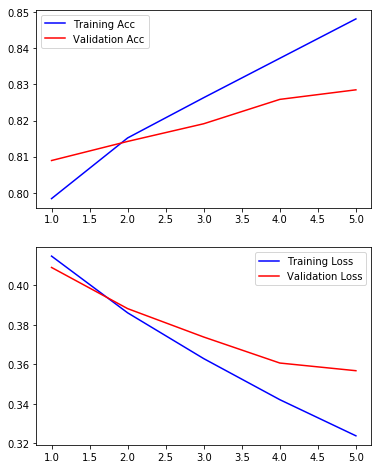

(<Figure size 432x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019425238B70>,
       dtype=object))

In [94]:
jmi.plot_keras_history(history)

In [362]:
model1B.save('model1B_emb-lstm-dense-dese-best_acc_93.hd5',include_optimizer=True, overwrite=True)
model1B.save_weights('model1B_emb-lstm-dense-dese-best_acc_93_WEIGHT.hdf')

In [460]:
# from keras.models import load_model
# from ann_visualizer.visualize import ann_viz;

# model1B_ = load_model('best_keras_model_lstm_dense10_dense1.hd5')
# model1B_.summary()

# # ann_viz(model1B_, title="Keras Artificial Neural Network")

#### Training Summary:
###### 1
- Run Time: 0:08:35.938002
- Accuracy: 85% accuracy
- Optimizer: adam

```_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_14 (Embedding)     (None, 41, 300)           11898600  
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_21 (Dense)             (None, 20)                6020      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
=================================================================
Total params: 12,625,841
Trainable params: 727,241
Non-trainable params: 11,898,600
_______________________________________________________________
```

###### 2
- Run time:  0:09:40.731445.
- Accuracy: 0.8552
- Optimizer: adam

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_16 (Embedding)     (None, 41, 300)           11898600  
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
=================================================================
Total params: 12,651,941
Trainable params: 753,341
Non-trainable params: 11,898,600
```


##### 3
    - Run time: 0:08:44.262527
    - Accuracy: .85077
    - Optimizer: adam

    ```
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    embedding_17 (Embedding)     (None, 41, 300)           11898600  
    _________________________________________________________________
    lstm_4 (LSTM)                (None, 300)               721200    
    _________________________________________________________________
    dense_28 (Dense)             (None, 20)                6020      
    _________________________________________________________________
    dense_29 (Dense)             (None, 100)               2100      
    _________________________________________________________________
    dense_30 (Dense)             (None, 1)                 101       
    =================================================================
    Total params: 12,628,021
    Trainable params: 729,421
    Non-trainable params: 11,898,600
    _________________________________________________________________

    ```

##### 4
- Run time: 0:09:58.815918.
- Accuracy: 0.856
- Optimizer: RMSprop(lr=0.003)


```
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_24 (Embedding)     (None, 41, 300)           11898600  
_________________________________________________________________
lstm_11 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dense_40 (Dense)             (None, 20)                6020      
_________________________________________________________________
dense_41 (Dense)             (None, 100)               2100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 21        
=================================================================
Total params: 12,629,961
Trainable params: 731,361
Non-trainable params: 11,898,600
_________________________________________________________________
```


##### 5

```
- Runtime: 0:23:59.338005.
- Accuracy: 0.865
- Optimizer = 'adam'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_38 (Embedding)     (None, 41, 300)           11898600  
_________________________________________________________________
lstm_23 (LSTM)               (None, 41, 300)           721200    
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 300)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                3010      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 11        
=================================================================
Total params: 12,622,821
Trainable params: 724,221
Non-trainable params: 11,898,600
_________________________________________________________________
```

###### 6
- Runtime: 0:09:42.248554.
- Optimizer: Adam
- Accuracy: 0.9287

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_2 (Embedding)      (None, 55, 300)           255600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
=================================================================
Total params: 979,821
Trainable params: 724,221
Non-trainable params: 255,600
_________________________________________________________________
```
###### 7
- Post-Peggy Removal
- Runtime: 
- Optimizer: Adam
- Accuracy: 0.9231
- 10:05.

# NEXT: 
- https://medium.com/@joaogabriellima/visualizing-the-architecture-of-your-own-model-of-artificial-neural-networks-7f0ea6b2a86d
- Named entity recognition
- Add randomforests
- Review cheatsheet

## Keras model 2 -using keras' tokenizer to fit_on_texts+one_hot
### Train, test, val split

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer, one_hot
from keras.utils.np_utils import to_categorical

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras import models, layers, optimizers

df_tokenize.head()

In [ ]:
len(set(df_tokenize.text_for_vectors.values)), len(df_tokenize.text_for_vectors.values)

In [ ]:
# Define tweets to be analyzed, fit tokenizer,generate sequences
tweets = df_tokenize['text_for_vectors']
# num_words=len(set(tweets))
tokenizer = Tokenizer(num_words=3000)

tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
sequences[0]

In [ ]:
one_hot_results = tokenizer.texts_to_matrix(tweets, mode='binary')

word_index = tokenizer.word_index
reverse_index = {v:k for k,v in word_index.items()}

### Test Train Split

In [ ]:
print(one_hot_results.shape, y.shape)

In [ ]:
import random, math
random.seed(42)
test_size = math.floor(one_hot_results.shape[0]*0.3)
test_index = random.sample(range(1,one_hot_results.shape[0]), test_size)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = y[test_index]
label_train = np.delete(y, test_index, 0)

In [ ]:
train.shape
train.shape[1]

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(50, activation='relu', input_shape=(3000,)))
model2.add(layers.Dense(25, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

In [ ]:
clock_1hot = bs.Clock()
clock_1hot.tic()

history = model2.fit(train, label_train, epochs=5, batch_size=256, validation_data=(test, label_test))
clock_1hot.toc('')

In [ ]:
model2.evaluate(test, label_test)

In [ ]:
plot_history(history)

In [ ]:
pause

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Visualizations
- check out Kate's link https://ai.googleblog.com/2016/12/open-sourcing-embedding-projector-tool.html
## Using Scattertext

In [541]:
# df_tokenize.head()

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,...,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped,sentiment_scores,compound_score,sentiment_class
date_published,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:19:00,LeftTroll,left,MAYMAYMYY,"If I loved you less, I might be able to talk a...",1.654348e+09,105.0,274.0,English,NaN,3/18/2015 12:19,...,False,[],"If I loved you less, I might be able to talk a...",[],[],loved less might able talk,"[loved, less, might, able, talk]","{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.5994,pos
2017-06-09 21:31:00,NewsFeed,local,SEATTLE_POST,Charges: Man who fired at cops grew increasing...,2.611151e+09,18573.0,10286.0,English,NaN,6/9/2017 21:31,...,False,[],Charges: Man who fired at cops grew increasing...,[],[],charges man fired cops grew increasingly volatile,"[charges, man, fired, cops, grew, increasingly...","{'neg': 0.449, 'neu': 0.551, 'pos': 0.0, 'comp...",-0.6908,neg
2017-08-10 03:04:00,RightTroll,Right,MAYLUUSSTR,Coming: 🎥 Coast To Coast 🎥 🔗 ⭐Starring⭐...,8.900000e+17,713.0,2945.0,English,NaN,8/10/2017 3:04,...,False,[RT THETXEMBASSY:],#topl Coming: 🎥 Coast To Coast 🎥 #8YearsASla...,"[#topl, #8YearsASlave]",[],coming coast coast starring american people c ...,"[coming, coast, coast, starring, american, peo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2016-04-13 23:06:00,NewsFeed,local,MILWAUKEEVOICE,Trial ordered for Milwaukee man accused in poi...,3.085226e+09,3306.0,2246.0,English,NaN,4/13/2016 23:06,...,False,[],Trial ordered for Milwaukee man accused in poi...,[#crime],[],trial ordered milwaukee man accused point blan...,"[trial, ordered, milwaukee, man, accused, poin...","{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",-0.2960,neg
2016-05-26 20:08:00,NewsFeed,local,TODAYPITTSBURGH,"Toyota Invests In Uber, Offers Lease Deals To ...",2.601236e+09,17401.0,5739.0,English,NaN,5/26/2016 20:08,...,False,[],"Toyota Invests In Uber, Offers Lease Deals To ...",[#news],[],toyota invests uber offers lease deals drivers,"[toyota, invests, uber, offers, lease, deals, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [643]:
idx_s = df_tokenize['tokens_stopped'].str.contains("\'s").index

df_tokenize.loc[idx_s]

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,...,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped,sentiment_scores,compound_score,sentiment_class,hashtag_strings
date_published,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:19:00,LeftTroll,left,MAYMAYMYY,"If I loved you less, I might be able to talk a...",1.654348e+09,105.0,274.0,English,NaN,3/18/2015 12:19,...,[],"If I loved you less, I might be able to talk a...",[],[],loved less might able talk,"[loved, less, might, able, talk]","{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",0.5994,pos,
2015-03-18 12:19:00,HashtagGamer,Hashtager,JMSCOXXX,Fake friends give the wrong answers,2.580516e+09,41.0,272.0,English,NaN,3/18/2015 12:19,...,[],Fake friends give the wrong answers,[],[],fake friends give wrong answers,"[fake, friends, give, wrong, answers]","{'neg': 0.504, 'neu': 0.244, 'pos': 0.252, 'co...",-0.4767,neg,
2015-03-18 12:19:00,RightTroll,Right,HAPPKENDRAHAPPY,I love it when I hear lyrics that totally appl...,2.535819e+09,44.0,47.0,English,NaN,3/18/2015 12:19,...,[],I love it when I hear lyrics that totally appl...,[],[],love hear lyrics totally apply current situation,"[love, hear, lyrics, totally, apply, current, ...","{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",0.6369,pos,
2017-06-09 21:31:00,NewsFeed,local,SEATTLE_POST,Charges: Man who fired at cops grew increasing...,2.611151e+09,18573.0,10286.0,English,NaN,6/9/2017 21:31,...,[],Charges: Man who fired at cops grew increasing...,[],[],charges man fired cops grew increasingly volatile,"[charges, man, fired, cops, grew, increasingly...","{'neg': 0.449, 'neu': 0.551, 'pos': 0.0, 'comp...",-0.6908,neg,
2017-08-10 03:04:00,RightTroll,Right,MAYLUUSSTR,Coming: 🎥 Coast To Coast 🎥 🔗 ⭐Starring⭐...,8.900000e+17,713.0,2945.0,English,NaN,8/10/2017 3:04,...,[RT THETXEMBASSY:],#topl Coming: 🎥 Coast To Coast 🎥 #8YearsASla...,"[#topl, #8YearsASlave]",[],coming coast coast starring american people c ...,"[coming, coast, coast, starring, american, peo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,#topl #8YearsASlave
2017-08-10 03:04:00,RightTroll,Right,MAYLUUSSTR,New Post: Working? Vacation? Working Vacat...,8.900000e+17,713.0,2945.0,English,NaN,8/10/2017 3:04,...,[RT drumpfshit360:],#topl New Post: Working? Vacation? Working V...,"[#topl, #MAGA, #draintheswamp, #crookedhi]",[],new post working vacation working vacation inside,"[new, post, working, vacation, working, vacati...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,#topl #MAGA #draintheswamp #crookedhi
2017-08-10 03:04:00,RightTroll,Right,MAYLUUSSTR,FACT: /Bros had access to every email eac...,8.900000e+17,713.0,2945.0,English,NaN,8/10/2017 3:04,...,[RT LadydeManorBorn:],#topl FACT: #ImranAwan/Bros had access to ev...,"[#topl, #ImranAwan]",[],fact bros access every email members congress ...,"[fact, bros, access, every, email, members, co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,#topl #ImranAwan
2016-04-13 23:06:00,NewsFeed,local,MILWAUKEEVOICE,Trial ordered for Milwaukee man accused in poi...,3.085226e+09,3306.0,2246.0,English,NaN,4/13/2016 23:06,...,[],Trial ordered for Milwaukee man accused in poi...,[#crime],[],trial ordered milwaukee man accused point blan...,"[trial, ordered, milwaukee, man, accused, poin...","{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",-0.2960,neg,#crime
2016-05-26 20:08:00,NewsFeed,local,TODAYPITTSBURGH,"Toyota Invests In Uber, Offers Lease Deals To ...",2.601236e+09,17401.0,5739.0,English,NaN,5/26/2016 20:08,...,[],"Toyota Invests In Uber, Offers Lease Deals To ...",[#news],[],toyota invests uber offers lease deals drivers,"[toyota, invests, uber, offers, lease, deals, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,#news


In [662]:
df_tokenize['group'] = ['troll' if row==1 else 'control' for row in df_tokenize['troll_tweet']]# if row==1 ] #, else 'control']
df_tokenize['group'].value_counts()

control    39086
troll      39086
Name: group, dtype: int64

In [663]:
import scattertext as st
import re, io, os,pkgutil, json
from scipy.stats import rankdata, hmean, norm

from scattertext import CorpusFromPandas, produce_scattertext_explorer
corpus = st.CorpusFromPandas(df_tokenize, category_col='group', text_col='content_stopped').build()

In [664]:
df_terms = corpus.get_term_count_df()
df_terms['Troll Tweets'] = corpus.get_scaled_f_scores('troll')
df_terms['Control Tweets'] = corpus.get_scaled_f_scores('control')
df_terms.head()


from pprint import pprint 
pprint(list(df_terms.sort_values(by='Troll Tweets', ascending=False).index[:10]))
pprint(list(df_terms.sort_values(by='Control Tweets', ascending=False).index[:10]))

['lose weight',
 'seattle',
 'kansas',
 'nfl',
 'islamic state',
 'robbery',
 'phoenix',
 'lsu',
 'dallas',
 'fatally']
['party told',
 'markle nasty',
 'simplistic writer',
 'noonan simplistic',
 'lng left',
 'peggy noonan',
 'simplistic',
 'noonan',
 'first shipment',
 'promised two']


In [667]:
html = st.produce_scattertext_explorer(corpus, category='control', category_name = 'Control',
                                       not_category_name='Troll', width_in_pixels=1000)
#                                       metadata=)
filename = "Troll-Tweet-Visualization.html"
with open(filename,'wb') as f:
    f.write(html.encode('utf-8'))
    IFrame(src=file_name, width = 1300, height=700)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\scattertext\ScatterChart.py:429: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  .apply(np.round).astype(np.int))
C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\scattertext\ScatterChart.py:432: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  .apply(np.round).astype(np.int))
C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\scattertext\ScatterChart.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

NameError: name 'IFrame' is not defined

___

- Loading in data for word clouds

    - df_full contains more data than just analyzed 
        - 

## WordClouds with Masks

In [32]:
jmi.reload(jmi)

Reloading...


<module 'mod4functions_JMI' from 'D:\\Users\\James\\Dropbox (Personal)\\CODING\\_FLATIRON\\Mod4_FinalProject\\dsc-4-final-project-online-ds-ft-021119\\mod4functions_JMI.py'>

In [1]:
import mod4functions_JMI as jmi
from bs_ds.imports import *
import bs_ds as bs

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


In [8]:
import os 
os.listdir('final_dataset/')

['newly_extracted_control_tweets.csv',
 'russian_troll_tweets_eng_only_date_pub_index.csv',
 'tweets_for_top40_ats.txt',
 '__df_full_tweets_all_text_processed__.csv']

In [22]:
df_small = pd.read_csv('final_dataset/df_small_resampled_tweets.csv', encoding='utf-8', index_col=0)
df_small.dropna(subset=['content_stopped'], inplace=True)
df_small.head(2)

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,...,updates,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped
date_published,,,,,,,,,,,,,,,,,,,,,
2016-07-15 21:32:00,NewsFeed,local,TODAYBOSTONMA,Raonic pulls out of Rio Olympics due to Zika f...,2.591848e+09,15211.0,14376.0,English,NaN,7/15/2016 21:32,...,14619.0,Raonic pulls out of Rio Olympics due to Zika f...,False,False,[],Raonic pulls out of Rio Olympics due to Zika f...,['#health'],[],raonic pulls rio olympics due zika fears,"['raonic', 'pulls', 'rio', 'olympics', 'due', ..."
2017-04-19 00:35:00,NewsFeed,local,DAILYSANDIEGO,"Szenja the Polar Bear, 21, Passes Away: SeaWor...",2.630842e+09,16098.0,8306.0,English,NaN,4/19/2017 0:35,...,20252.0,"Szenja the Polar Bear, 21, Passes Away: SeaWor...",False,False,[],"Szenja the Polar Bear, 21, Passes Away: SeaWor...",[],[],szenja polar bear passes away seaworld,"['szenja', 'polar', 'bear', 'passes', 'away', ..."


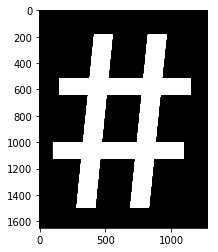

In [18]:
from PIL import Image

## Twitter Bird masks
mask_f_right = np.array(Image.open('figures/masks/twitter1.png'))
mask_f_left = np.array(Image.open('figures/masks/twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open('figures/masks/Hashtags and Ats Masks-01.jpg'))
mask_hashtag = np.array(Image.open('figures/masks/Hashtags and Ats Masks-02.jpg'))
plt.imshow(mask_hashtag)

In [387]:
df_small.columns

Index(['account_category', 'account_type', 'author', 'content',
       'external_author_id', 'followers', 'following', 'language', 'post_type',
       'publish_date', 'region', 'retweet', 'troll_tweet', 'updates',
       'content_raw', 'has_RT', 'starts_RT', 'content_starts_RT',
       'content_min_clean', 'content_hashtags', 'content_mentions',
       'content_stopped', 'tokens_stopped', 'hashtag_strings'],
      dtype='object')

In [393]:
## createing a wordcloud for the hashtags section 
from nltk import regexp_tokenize
tags_troll = df_small.groupby('troll_tweet').get_group(1)['content_hashtags']#.apply(lambda x:) #.to_list() 
tags_contr = df_small.groupby('troll_tweet').get_group(0)['content_hashtags']#.to_list()#.str

troll_hash_tokens = tags_troll.apply(lambda x: regexp_tokenize(x,'(#\w*)'))
contr_hash_tokens = tags_contr.apply(lambda x: regexp_tokenize(x,'(#\w*)'))

tags_troll = ' '.join(troll_hash_tokens)
tags_contr = ' '.join(contr_hash_tokens)

# troll_hash_tokens = regexp_tokenize(tags_troll,'(#\w*)')
# contr_hash_tokens = regexp_tokenize(tags_contr,'(#\w*)')

# df_small['hashtag_strings'][:10]
contr_hash_tokens[:10]
tags_troll[:10]

TypeError: sequence item 0: expected str instance, list found

In [17]:
from wordcloud import WordCloud
# wordcloud.stopwords=[]
# wordcloud.collocations=False
max_font_size=100
width=600
height=600
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False

# Create a WordCloud for each group and then plot
troll_hashtag_cloud = WordCloud(mask=mask_hashtag,contour_color='cornflowerblue', contour_width=2,
                        max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                        background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations)

contr_hashtag_cloud = WordCloud(mask=mask_hashtag,contour_color='cornflowerblue', contour_width=2,
                        max_font_size=max_font_size, width=width, height=height, max_words=max_words, 
                        background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations)

troll_hashtag_cloud.generate(' '.join(tags_troll)) #troll_hash_tokens))
contr_hashtag_cloud.generate(' '.join(tags_contr))# contr_hash_tokens))


fig,ax = jmi.plot_fit_cloud(troll_hashtag_cloud,contr_hashtag_cloud)


NameError: name 'mask_hashtag' is not defined

In [21]:
TEXT = jmi.get_group_texts_tokens(df_small)

dict_keys(['controls', 'trolls']):['tokens']|['text']


In [36]:
from wordcloud import WordCloud
# wordcloud.stopwords=[]
# wordcloud.collocations=False
max_font_size=100
width=600
height=600
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False

# Create a WordCloud for each group and then plot
troll_cloud = WordCloud(mask=mask_f_right,contour_color='cornflowerblue', contour_width=2,
                        max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                        background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations)

contr_cloud = WordCloud(mask=mask_f_left,contour_color='cornflowerblue', contour_width=2,
                        max_font_size=max_font_size, width=width, height=height, max_words=max_words, 
                        background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations)




dict_keys(['controls', 'trolls']):['tokens']|['text']


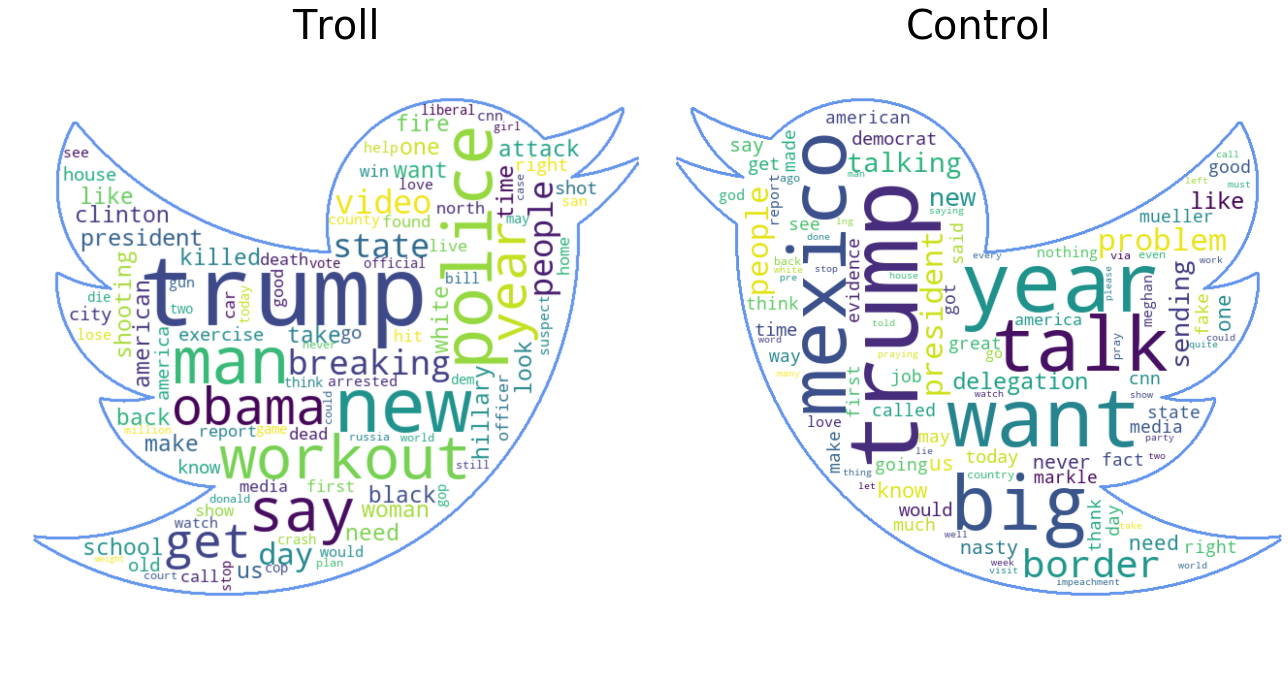

In [37]:
TEXT = jmi.get_group_texts_tokens(df_small)
troll_cloud.generate(TEXT['trolls']['text'])
contr_cloud.generate(TEXT['controls']['text'])

fig,ax = jmi.plot_fit_cloud(troll_cloud,contr_cloud)

In [38]:
# jmi.get_group_texts_tokens(df_small,column='hashtag_strings')

KeyError: 'hashtag_strings'

In [283]:
def transform_image_mask_white(val):
    """Will convert any pixel value of 0 (white) to 255 for wordcloud mask."""
    if val==0:
        return 255
    else:  
        return val

def transform_image_to_mask(image):
    import numpy as np
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#     mask = np.array(Image.open(filename))
    mask =image
    transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)
    
    
    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_image_mask_white, transformed_mask[i]))
    return transformed_mask

In [266]:
image.shape

(1040, 1280, 4)

In [267]:
np.min(image)

36

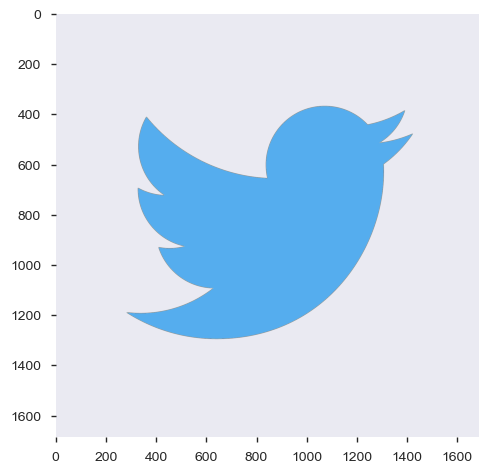

In [271]:
from PIL import Image
img = Image.open('figures/twitter2.png')
plt.imshow(img, interpolation='bilinear')
plt.grid(False)


## TSNE FOR 3D COMPARISON PLOTS OF TFIDF

First, we need to pull the words out of the dictionaries stored in tf_idf_all_docs so that only the values remain, and store them in lists instead of dictionaries. This is because the t-SNE object only works with Array-like objects, not dictionaries.

In the cell below, create a list of lists that contains a list representation of the values of each of the dictionaries stored in tf_idf_all_docs. The same structure should remain--e.g. the first list should contain only the values that were in the 1st dictionary in tf_idf_all_docs, and so on.
```python
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]
```

In [ ]:
# Make tf_idf_vals_list


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d


# Visualizing with TSNE
kendrick_3d = transformed_data_3d[10:]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[:10]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')

ax.view_init(30, 10)
ax.legend()
plt.show()
```

# Generating Word Embeddings

- [ ] Need to use apply to apply the hashtag, url, and mentions regex's to the whole dataframe 

In [ ]:
# Combining all regular expressions operations for convenience
import re
url = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
hashtag = re.compile(r'(\#\w*)')
mentions = re.compile(r'(\@\w*)')

df_troll_clean = df_sm_troll.copy()
df_contr_clean = df_sm_contr.copy()

df_troll_clean['content'].apply(lambda x: url.sub(' ',x))
df_contr_clean['content'].apply(lambda x: url.sub(' ',x))

df_troll_clean['content'].apply(lambda x: hashtag.sub(' ',x))
df_contr_clean['content'].apply(lambda x: hashtag.sub(' ',x))

df_troll_clean['content'].apply(lambda x: mentions.sub(' ',x))
df_contr_clean['content'].apply(lambda x: mentions.sub(' ',x))

In [ ]:
np.random.choice(df_sm_troll['content']),np.random.choice(df_sm_contr['content'])

In [ ]:
from nltk import word_tokenize
from gensim.models import Word2Vec
data_tr = df_troll_clean['content'].map(word_tokenize)
data_co = df_contr_clean['content'].map(word_tokenize)

In [ ]:
model_tr = Word2Vec(data_tr, size=100, window=5, min_count=1, workers=4)
model_co = Word2Vec(data_co, size=100, window=5, min_count=1, workers=4)

In [ ]:
model_tr.train(data_tr, total_examples=model.corpus_count, epochs=10)
model_co.train(data_co, total_examples=model.corpus_count, epochs=10)

In [ ]:
wvtr = model_tr.wv
wvco = model_co.wv